In [1]:
import os
os.getcwd()
os.chdir('C:/Users/William/patternflow1/PatternFlow/recognition/Q8 Autoencoder-OASIS/')
import modules
from modules import VQVAE1
from dataset import DataProcess
from train import TRAINVALTEST
#TRAINDATA,VALIDDATA,TESTDATA=DataProcess()


In [2]:
in1=VQVAE1(TRAINDATA,DATALOADER,10,100,0.0001,0.3)

NameError: name 'TRAINDATA' is not defined

In [3]:
import dill as pickle
with open('goodmodel1.pkl', 'rb') as file:
  finalmodel=pickle.load(file)
#

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
110.72122955322266
tensor(141.1508, device='cuda:0', grad_fn=<DivBackward0>)
251.87203979492188


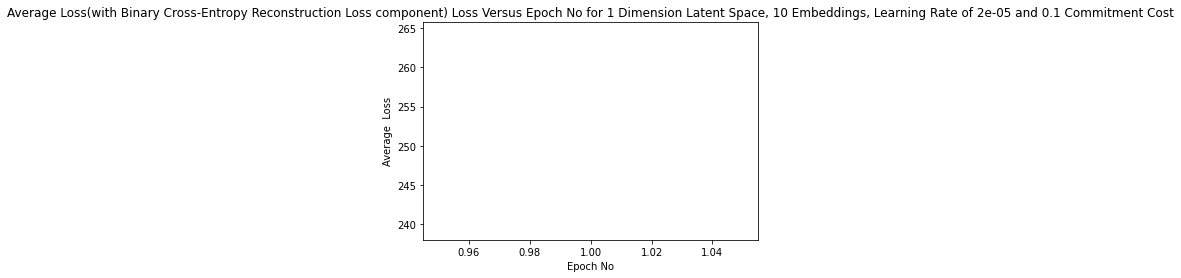

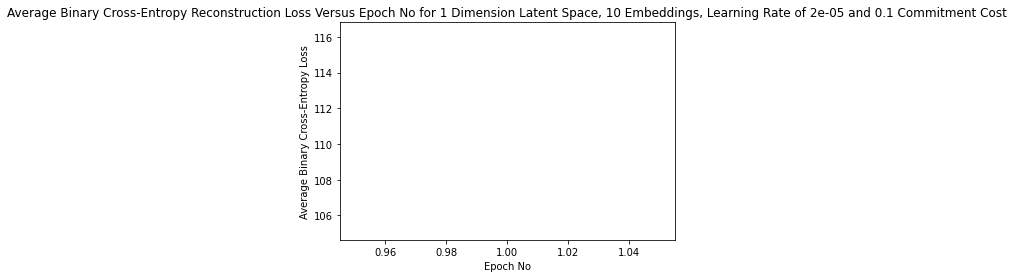

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
110.72122955322266
tensor(166.8146, device='cuda:0', grad_fn=<DivBackward0>)
277.5357971191406


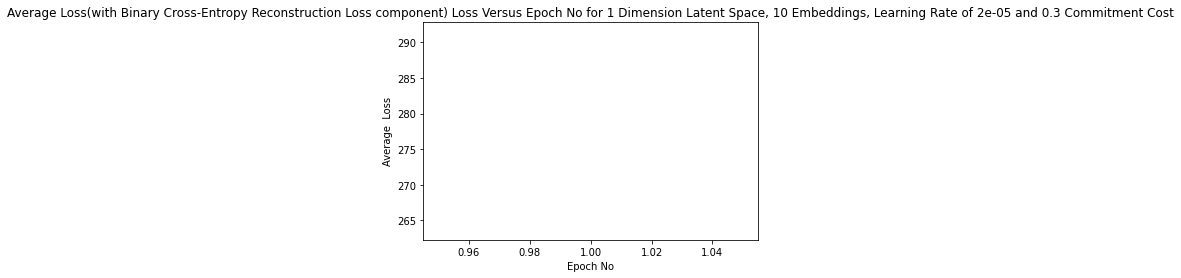

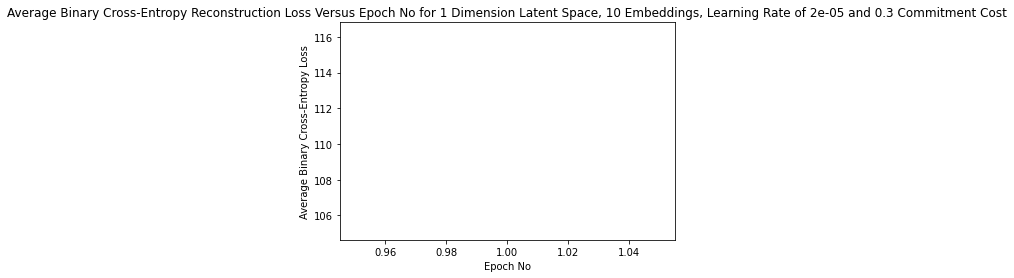

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
110.72122955322266
tensor(205.3104, device='cuda:0', grad_fn=<DivBackward0>)
316.0316467285156


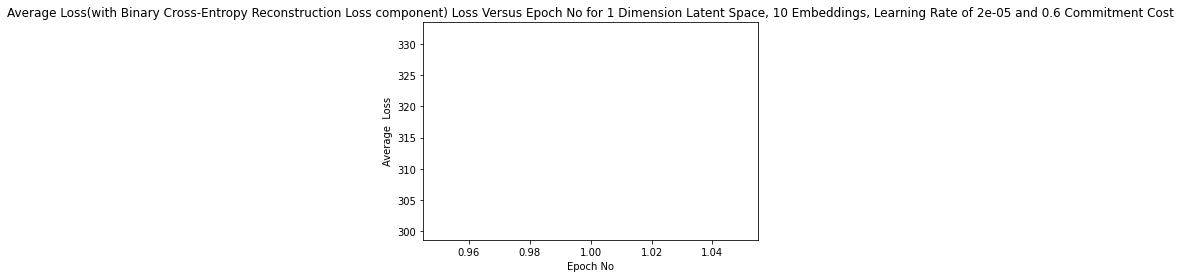

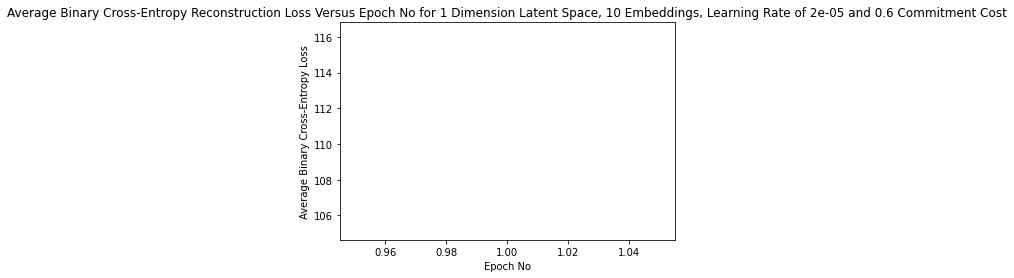

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
106.52059173583984
tensor(38.1965, device='cuda:0', grad_fn=<DivBackward0>)
144.7171173095703


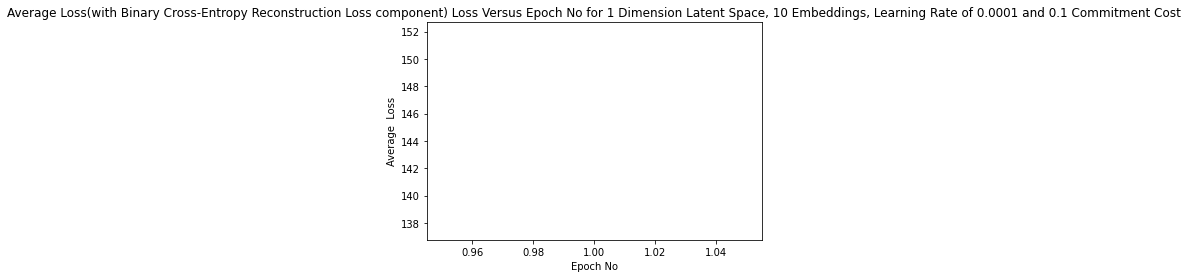

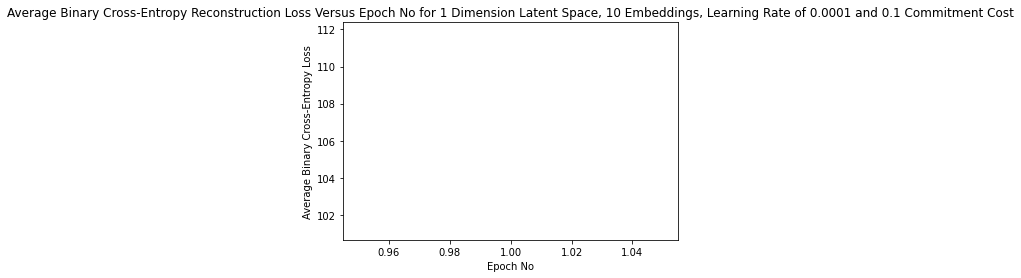

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
106.52059173583984
tensor(45.1414, device='cuda:0', grad_fn=<DivBackward0>)
151.6620330810547


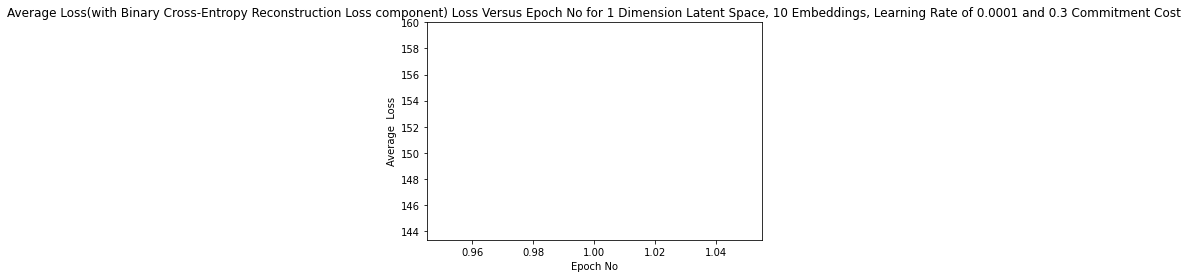

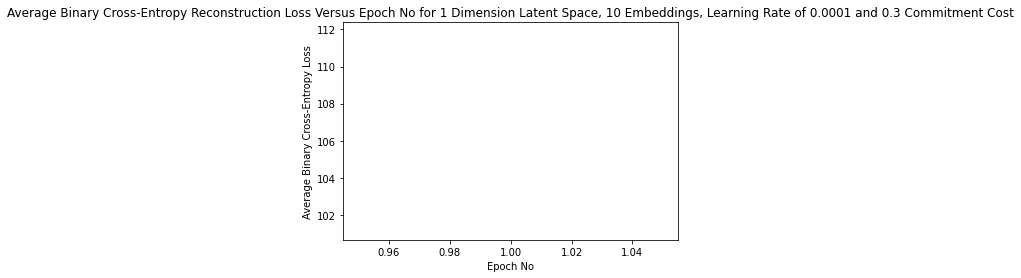

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
106.52059173583984
tensor(55.5587, device='cuda:0', grad_fn=<DivBackward0>)
162.07928466796875


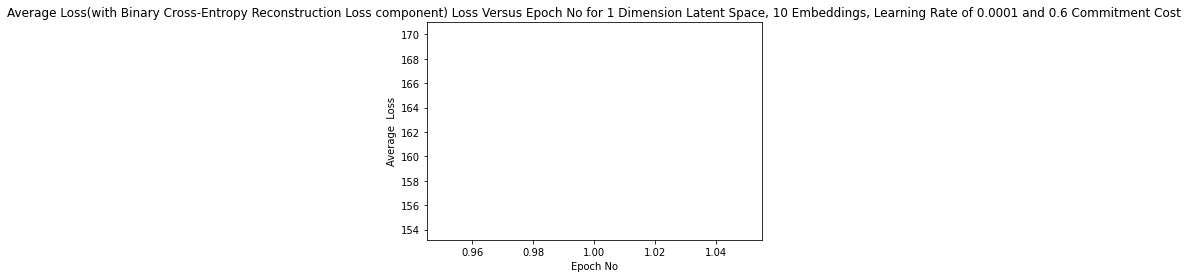

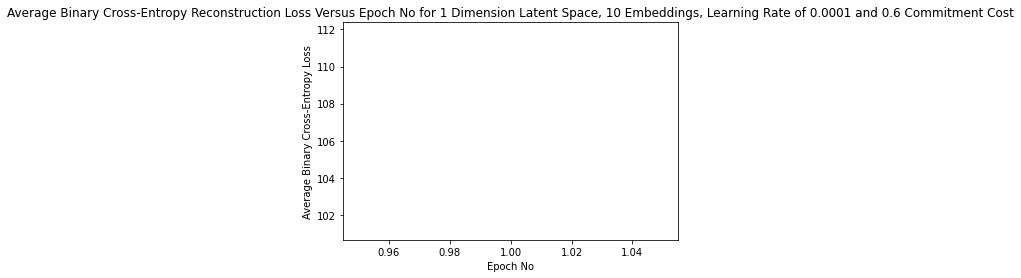

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
70.64636993408203
tensor(4.8502, device='cuda:0', grad_fn=<DivBackward0>)
75.49658966064453


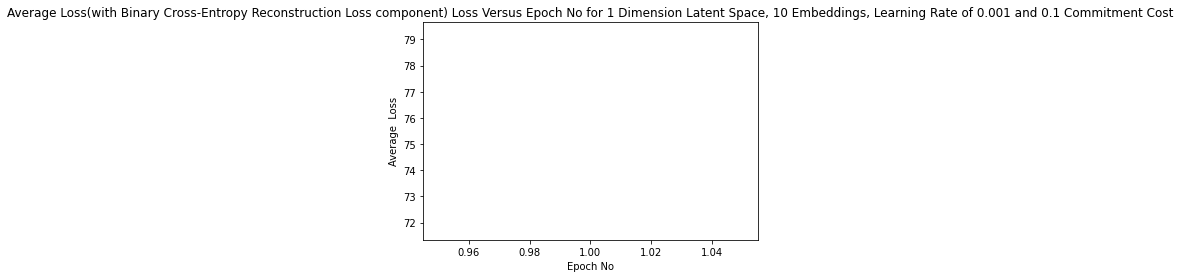

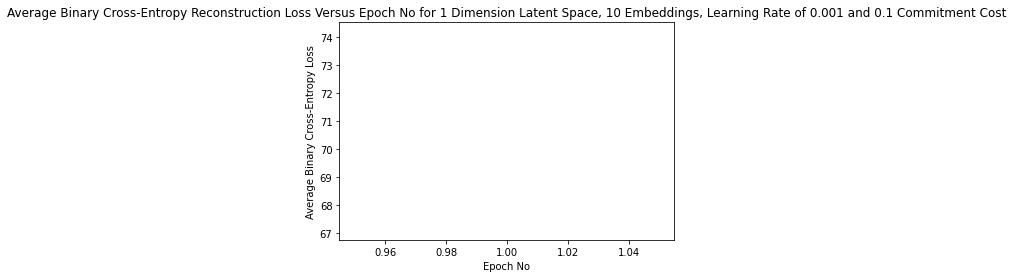

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
70.64636993408203
tensor(5.7321, device='cuda:0', grad_fn=<DivBackward0>)
76.3784408569336


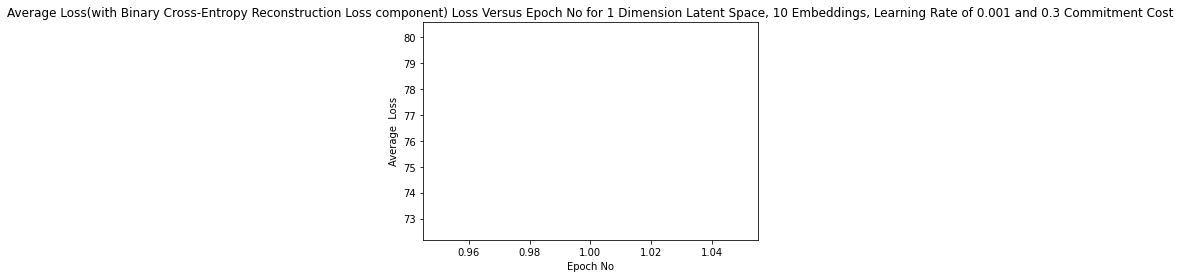

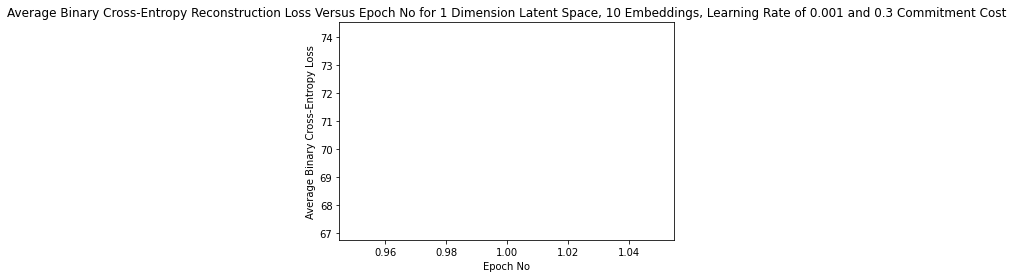

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
70.64636993408203
tensor(7.0549, device='cuda:0', grad_fn=<DivBackward0>)
77.70122528076172


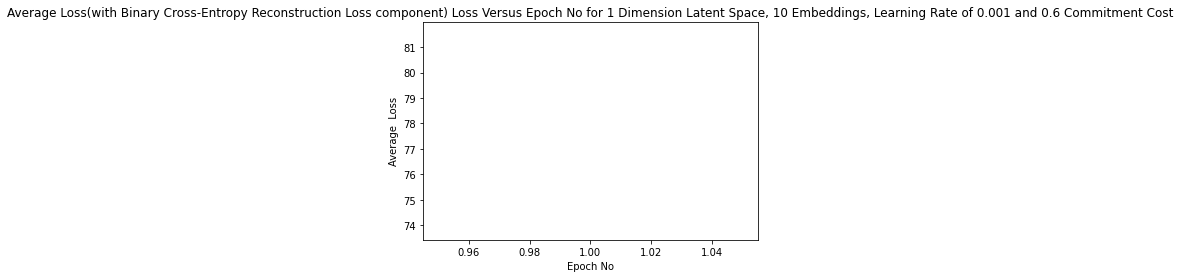

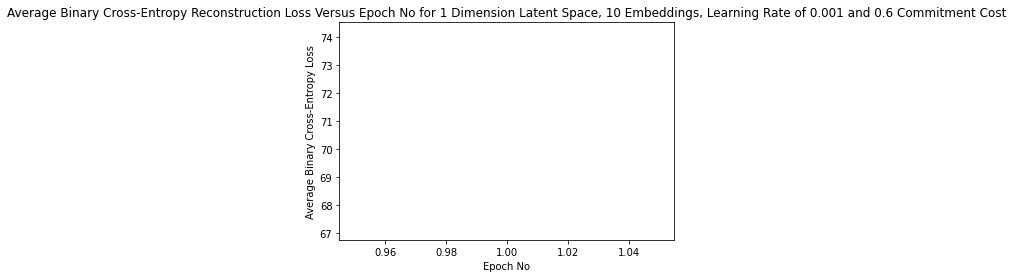

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
109.323486328125
tensor(156.3560, device='cuda:0', grad_fn=<DivBackward0>)
265.67950439453125


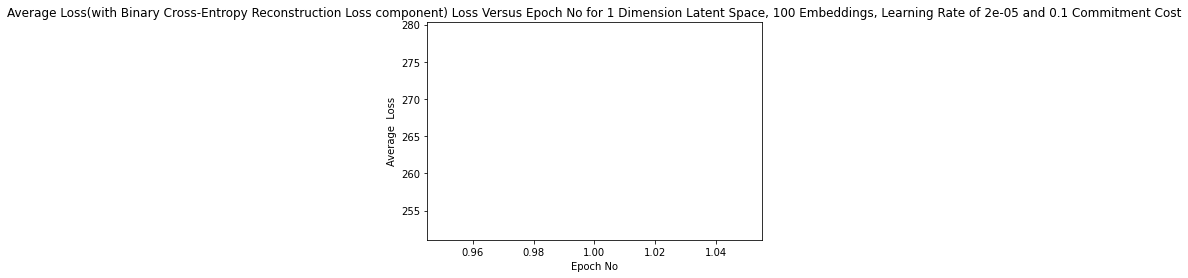

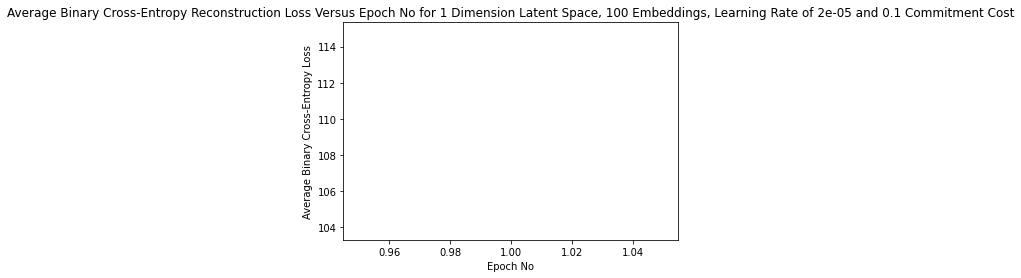

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
109.323486328125
tensor(184.7845, device='cuda:0', grad_fn=<DivBackward0>)
294.1079406738281


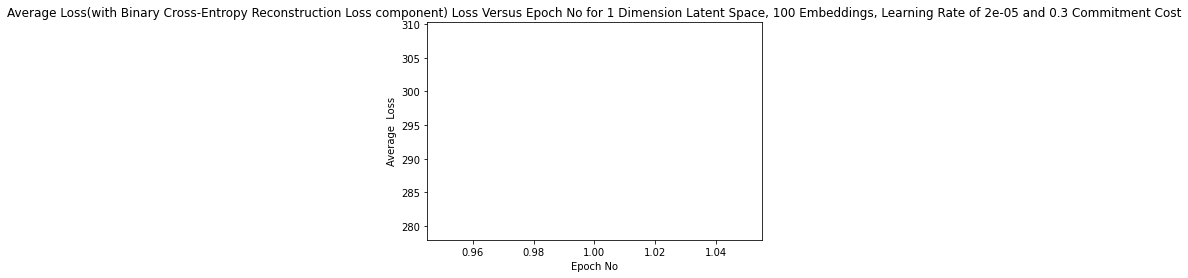

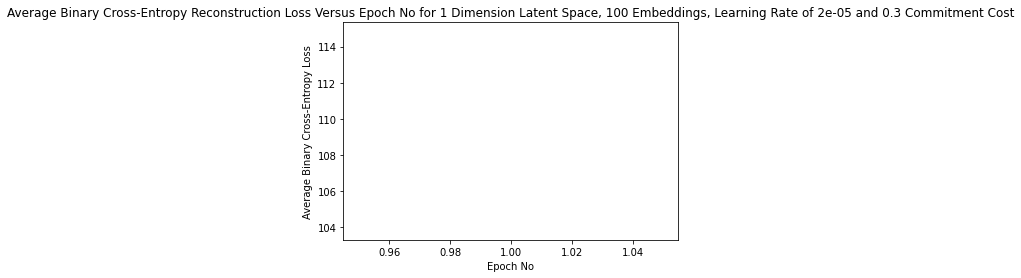

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
109.323486328125
tensor(227.4270, device='cuda:0', grad_fn=<DivBackward0>)
336.7504577636719


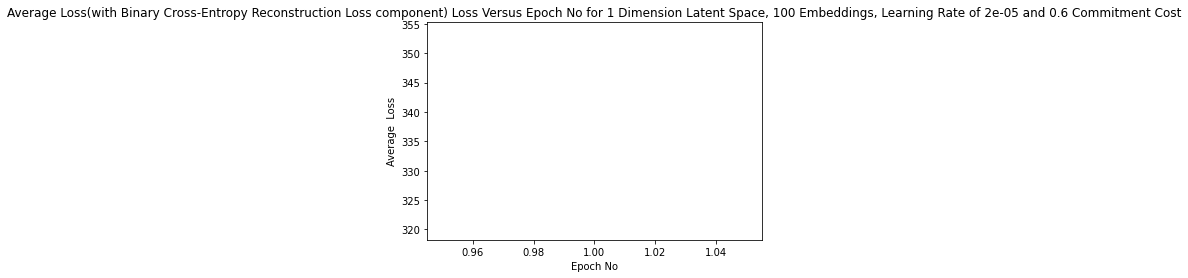

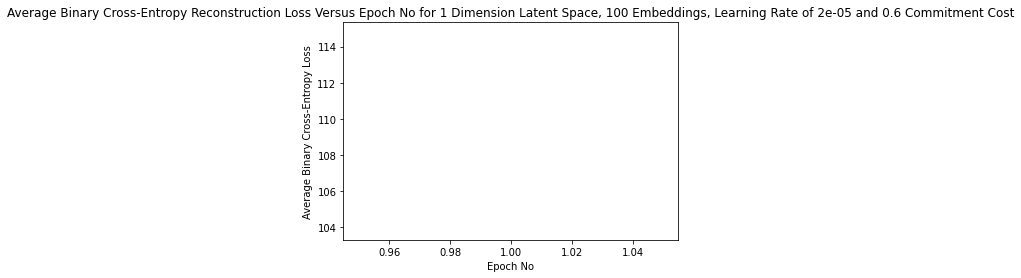

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
105.37667846679688
tensor(43.5768, device='cuda:0', grad_fn=<DivBackward0>)
148.95347595214844


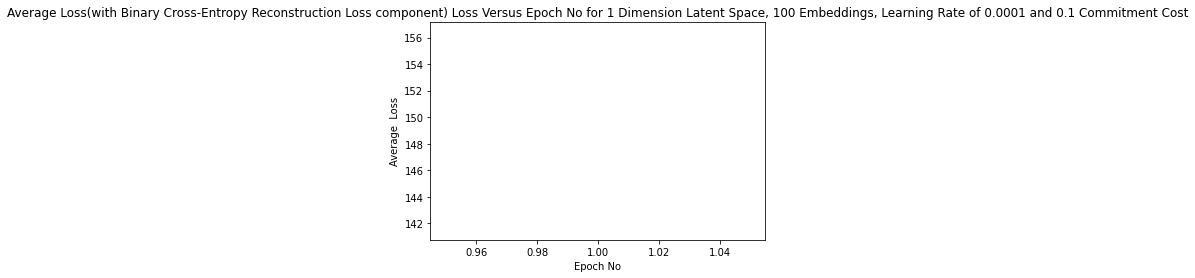

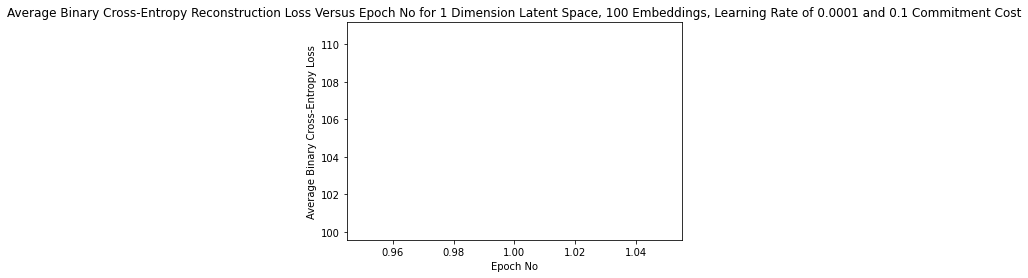

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
105.37667846679688
tensor(51.4999, device='cuda:0', grad_fn=<DivBackward0>)
156.87655639648438


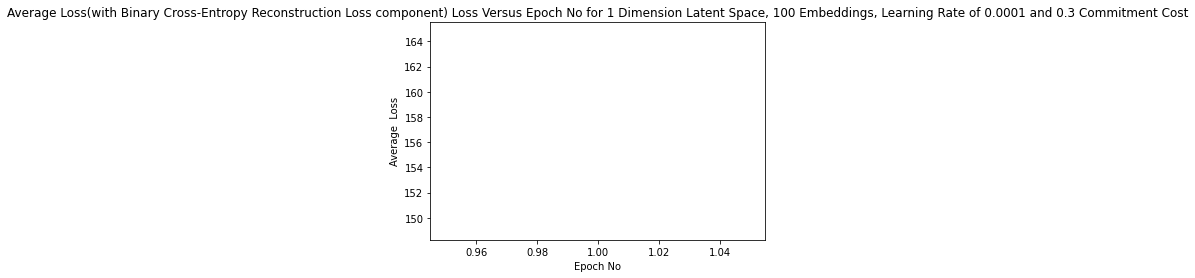

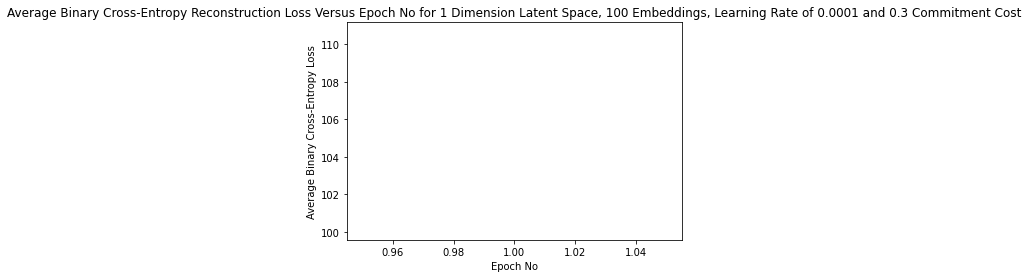

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
105.37667846679688
tensor(63.3845, device='cuda:0', grad_fn=<DivBackward0>)
168.76113891601562


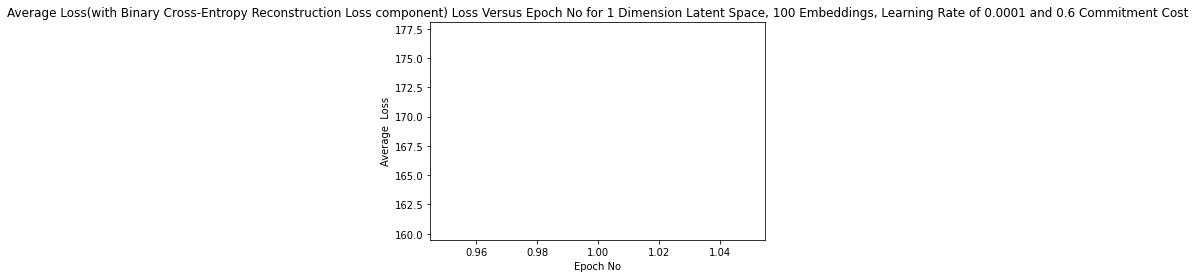

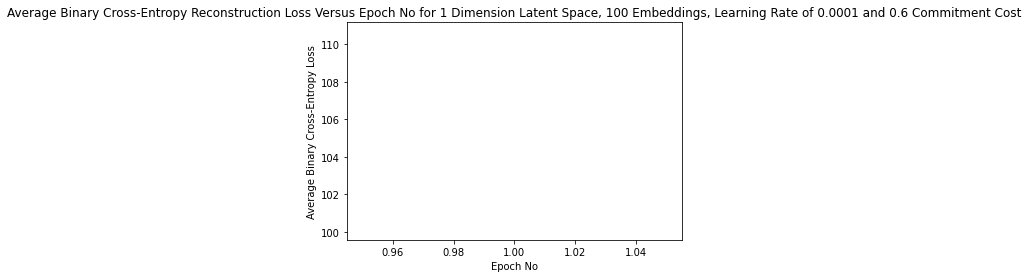

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
69.82919311523438
tensor(3.9696, device='cuda:0', grad_fn=<DivBackward0>)
73.79882049560547


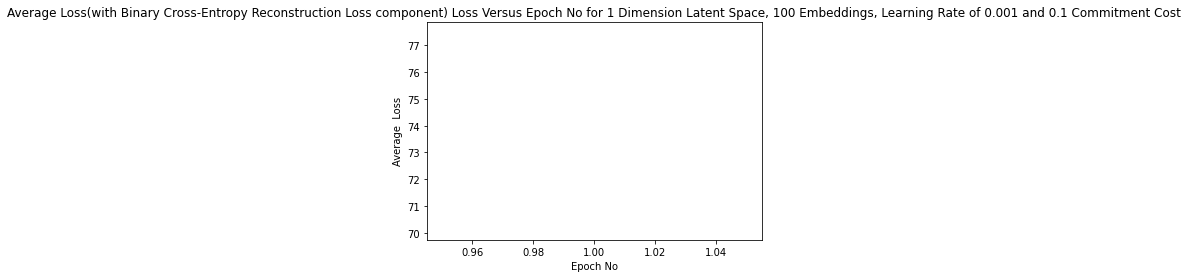

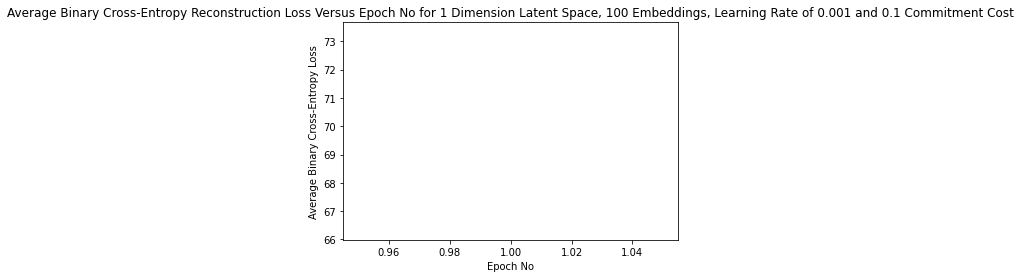

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
69.82919311523438
tensor(4.6914, device='cuda:0', grad_fn=<DivBackward0>)
74.52057647705078


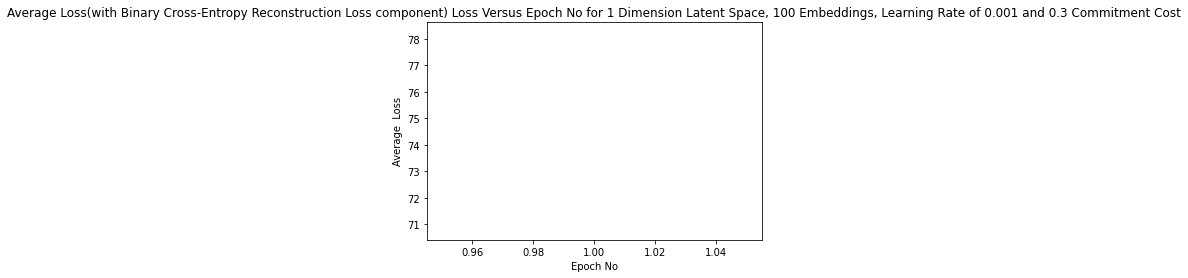

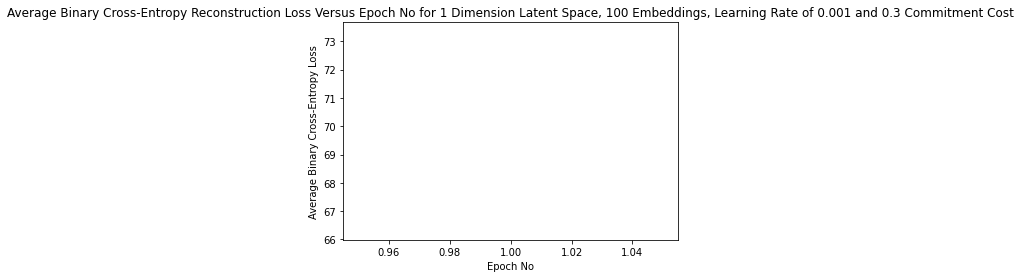

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
69.82919311523438
tensor(5.7740, device='cuda:0', grad_fn=<DivBackward0>)
75.60319519042969


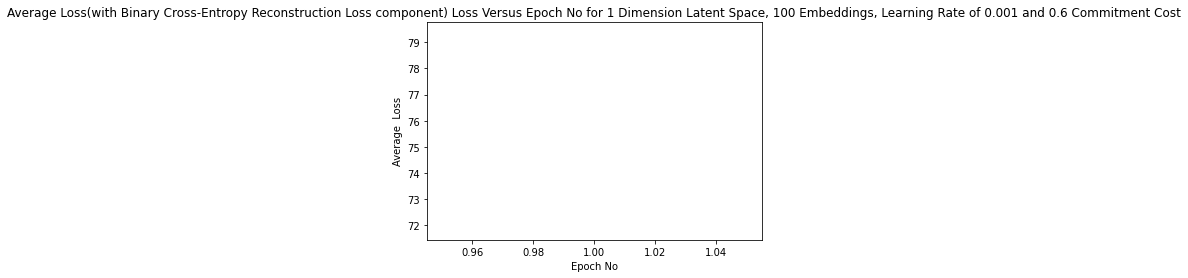

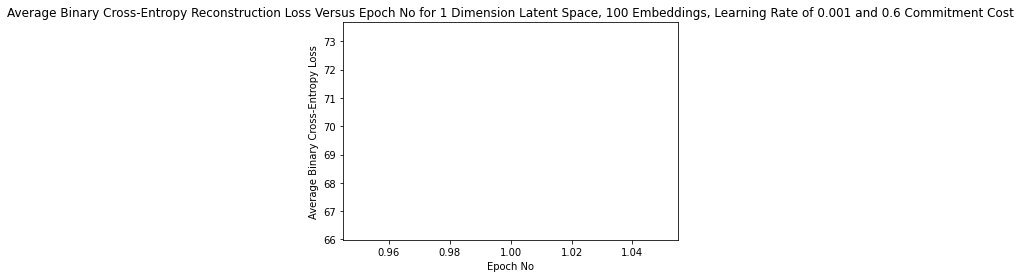

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
110.72122955322266
tensor(141.1508, device='cuda:0', grad_fn=<DivBackward0>)
251.87203979492188


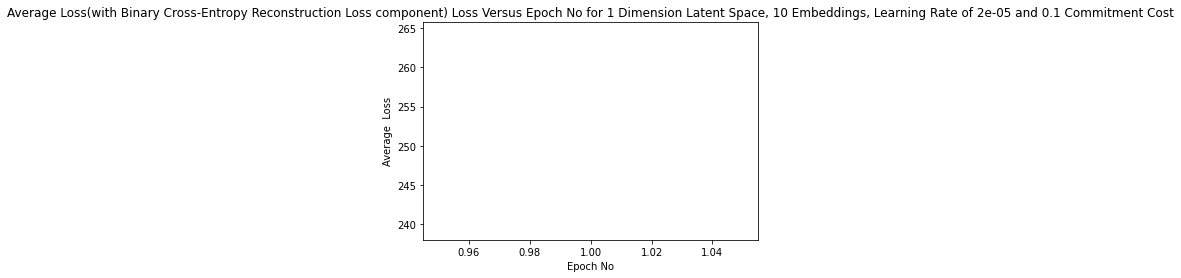

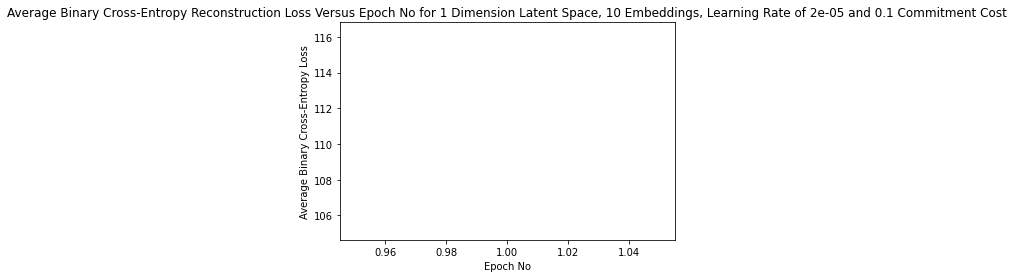

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
110.72122955322266
tensor(166.8146, device='cuda:0', grad_fn=<DivBackward0>)
277.5357971191406


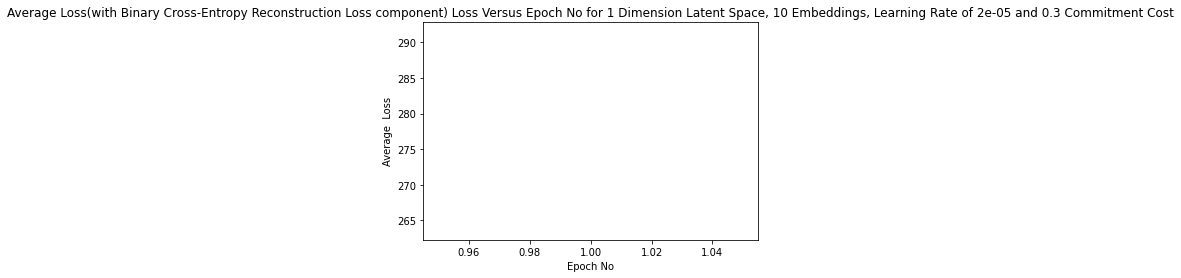

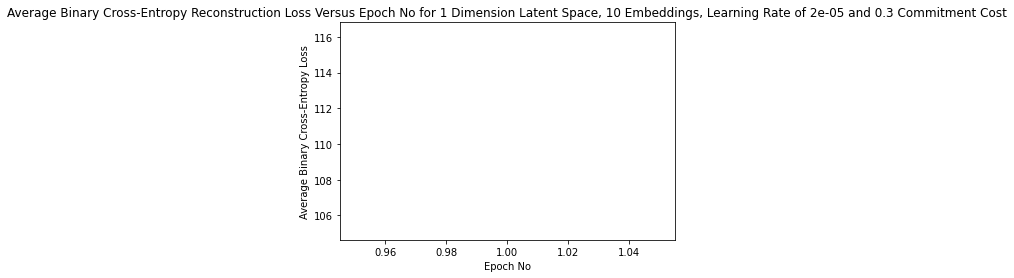

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
110.72122955322266
tensor(205.3104, device='cuda:0', grad_fn=<DivBackward0>)
316.0316467285156


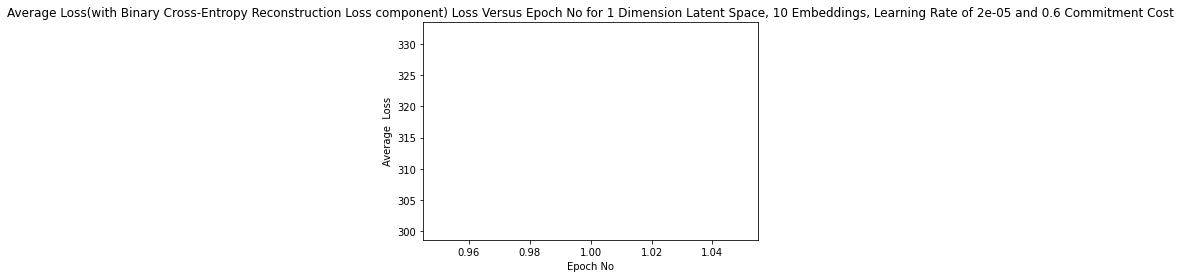

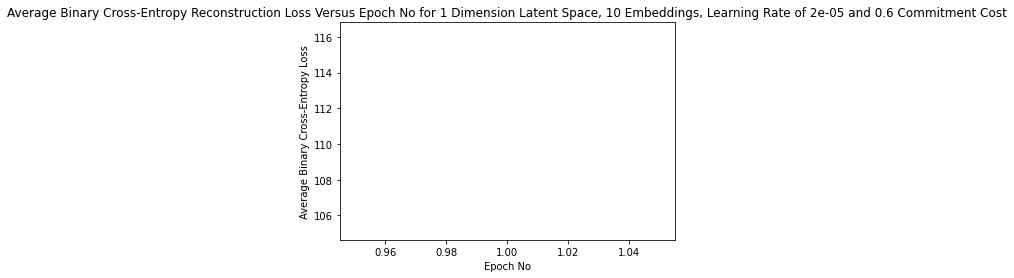

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
106.52059173583984
tensor(38.1965, device='cuda:0', grad_fn=<DivBackward0>)
144.7171173095703


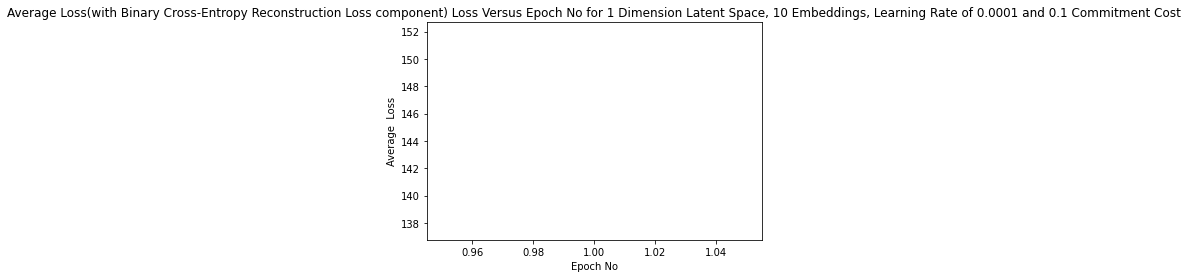

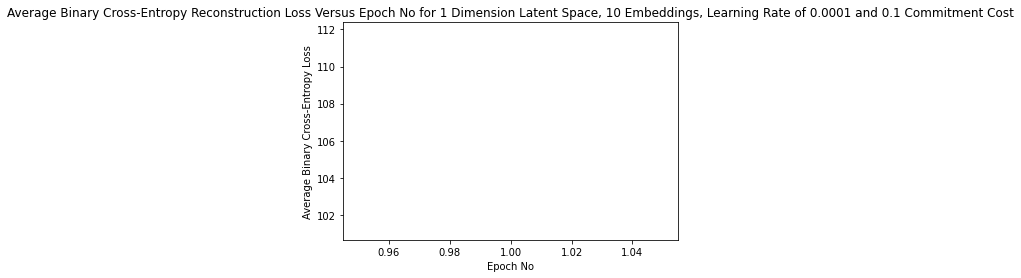

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
106.52059173583984
tensor(45.1414, device='cuda:0', grad_fn=<DivBackward0>)
151.6620330810547


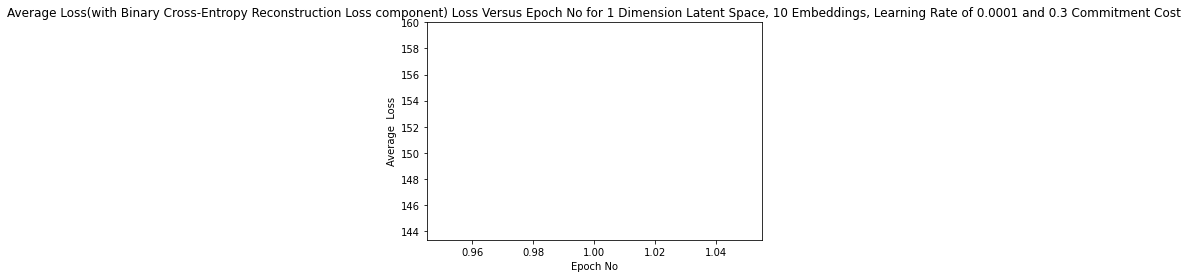

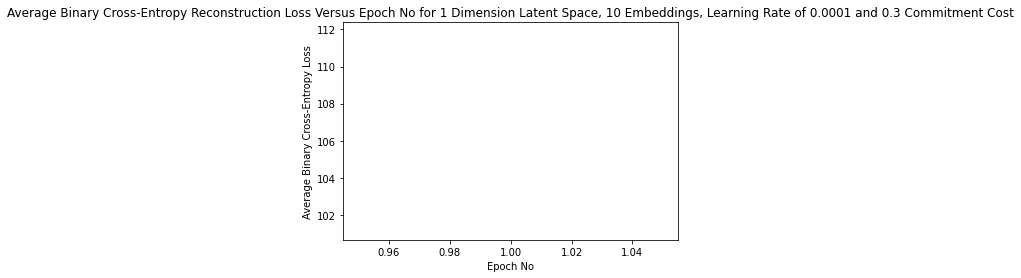

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
106.52059173583984
tensor(55.5587, device='cuda:0', grad_fn=<DivBackward0>)
162.07928466796875


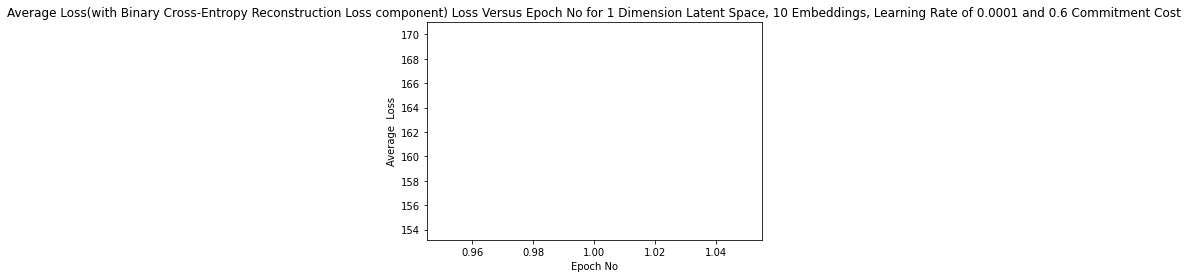

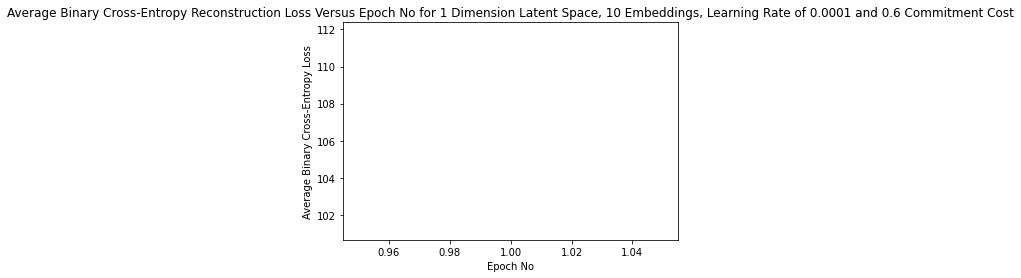

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
70.64636993408203
tensor(4.8502, device='cuda:0', grad_fn=<DivBackward0>)
75.49658966064453


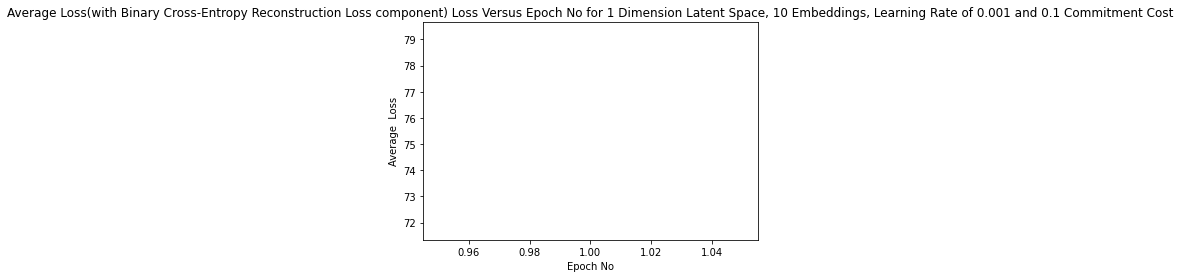

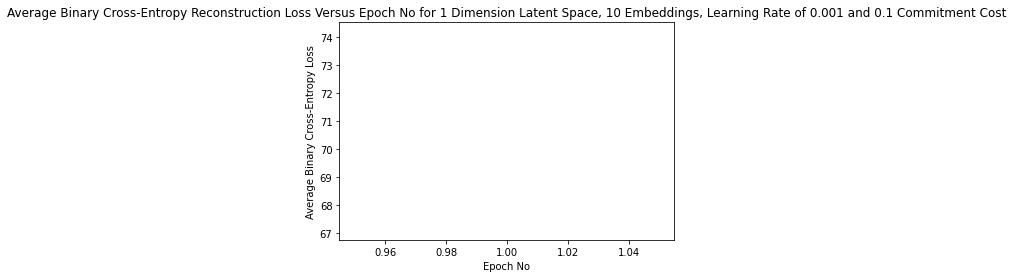

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
70.64636993408203
tensor(5.7321, device='cuda:0', grad_fn=<DivBackward0>)
76.3784408569336


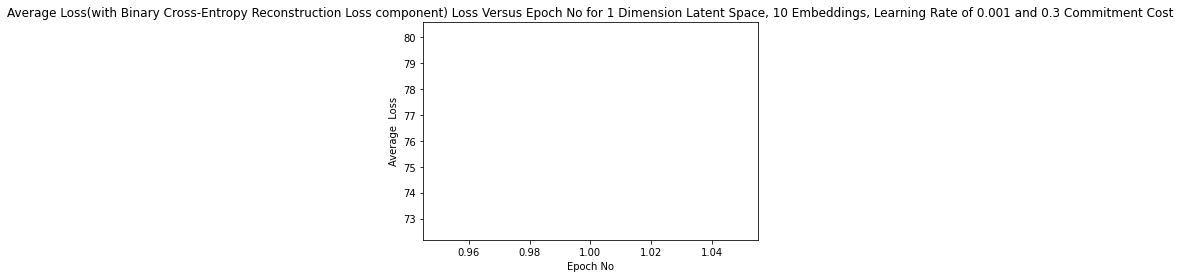

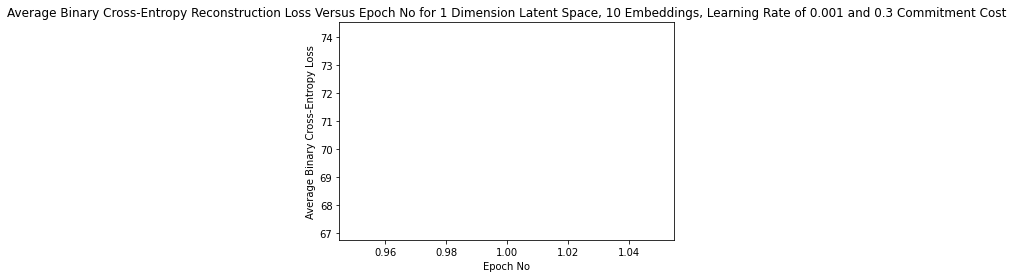

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
70.64636993408203
tensor(7.0549, device='cuda:0', grad_fn=<DivBackward0>)
77.70122528076172


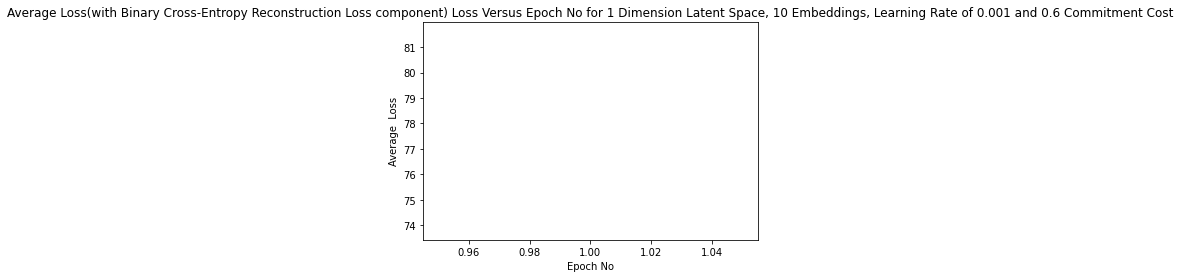

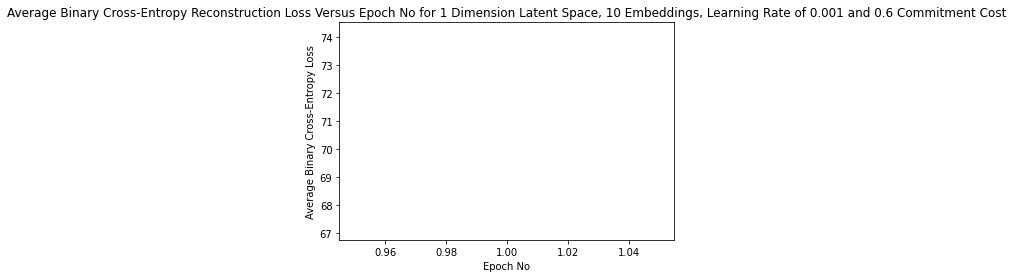

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
109.323486328125
tensor(156.3560, device='cuda:0', grad_fn=<DivBackward0>)
265.67950439453125


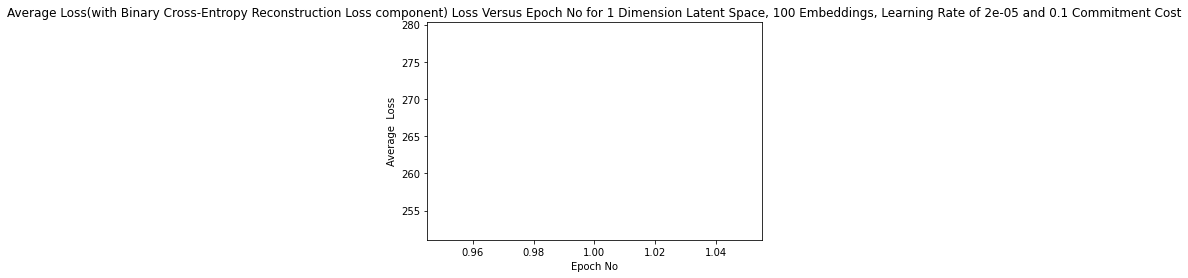

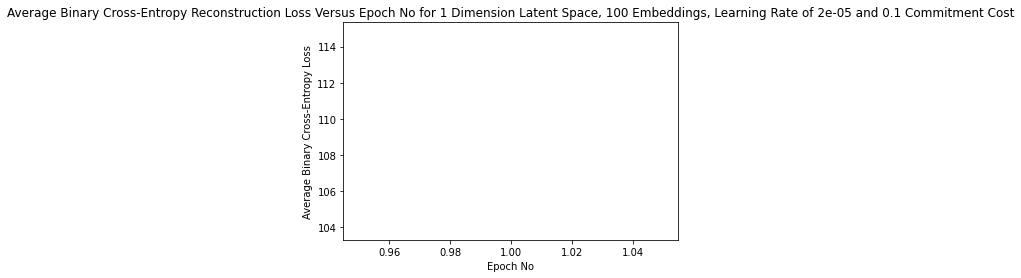

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
109.323486328125
tensor(184.7845, device='cuda:0', grad_fn=<DivBackward0>)
294.1079406738281


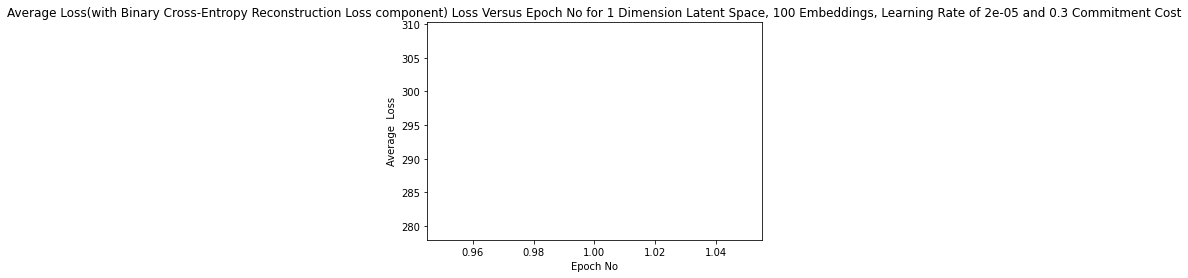

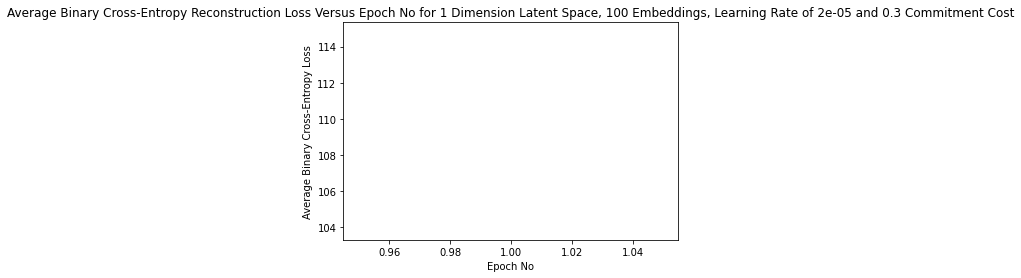

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
109.323486328125
tensor(227.4270, device='cuda:0', grad_fn=<DivBackward0>)
336.7504577636719


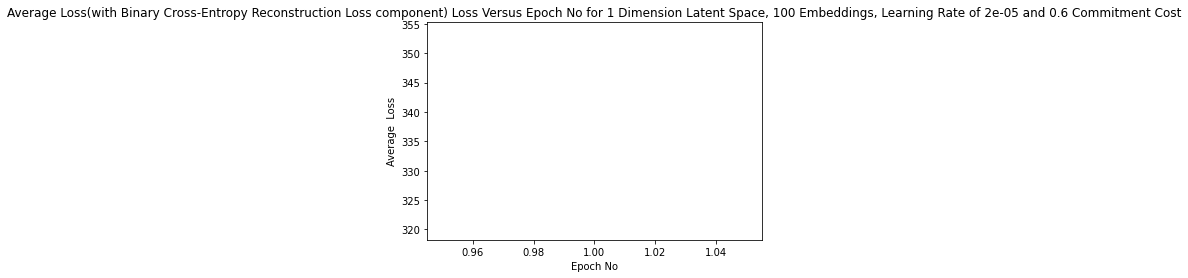

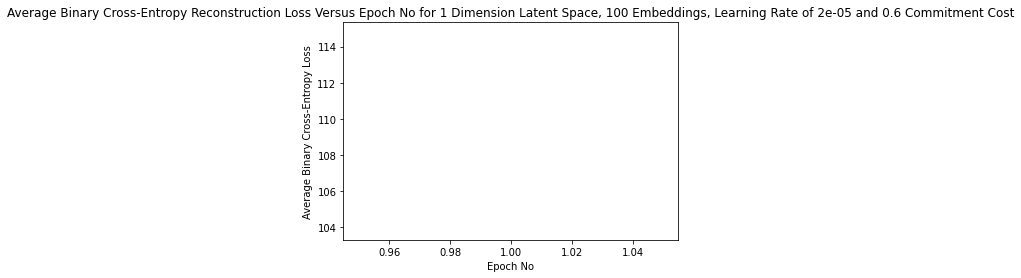

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
105.37667846679688
tensor(43.5768, device='cuda:0', grad_fn=<DivBackward0>)
148.95347595214844


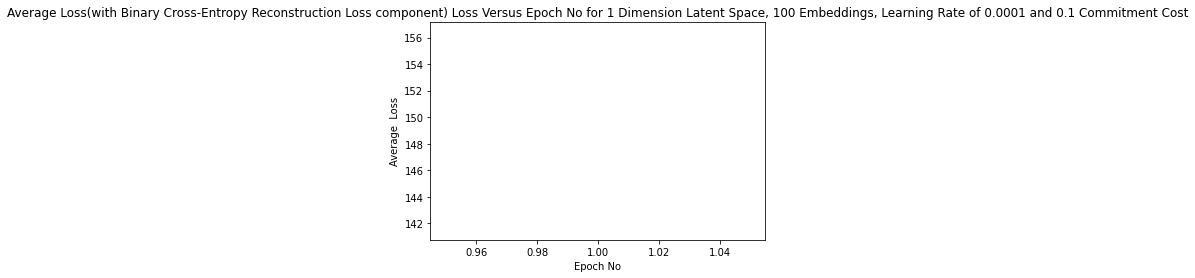

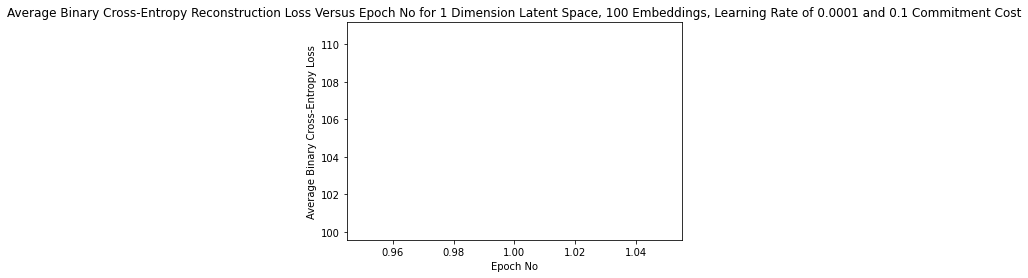

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
105.37667846679688
tensor(51.4999, device='cuda:0', grad_fn=<DivBackward0>)
156.87655639648438


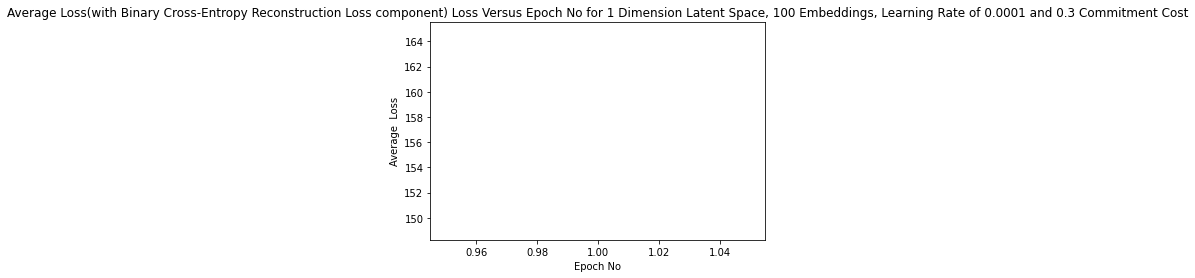

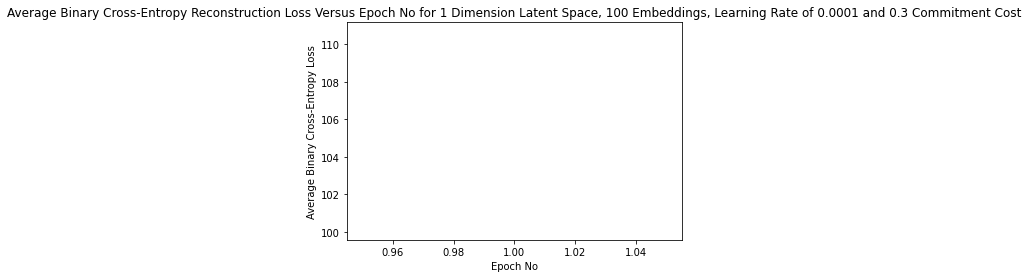

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
105.37667846679688
tensor(63.3845, device='cuda:0', grad_fn=<DivBackward0>)
168.76113891601562


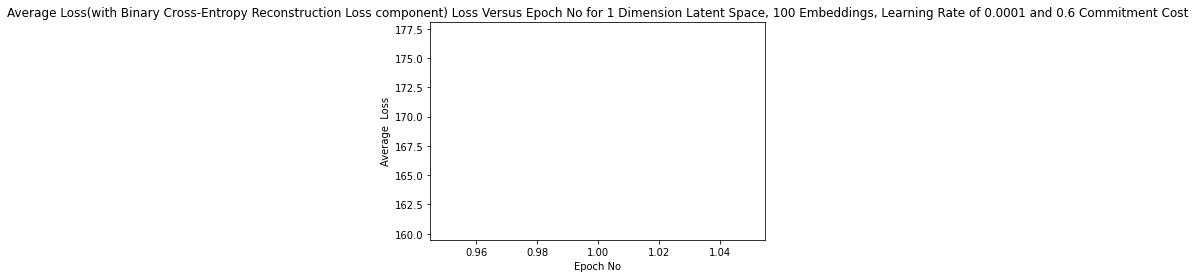

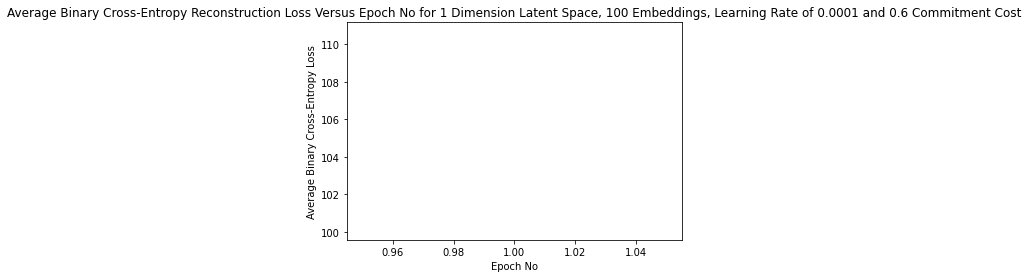

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
69.82919311523438
tensor(3.9696, device='cuda:0', grad_fn=<DivBackward0>)
73.79882049560547


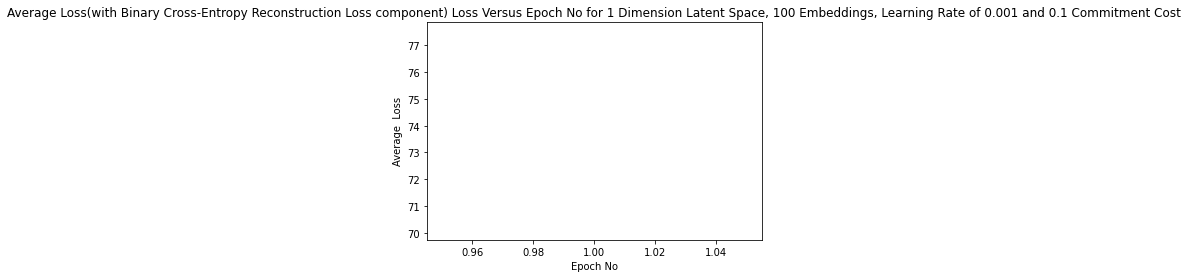

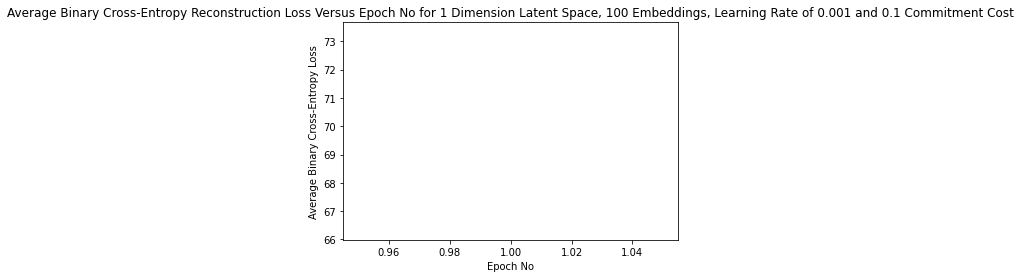

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
69.82919311523438
tensor(4.6914, device='cuda:0', grad_fn=<DivBackward0>)
74.52057647705078


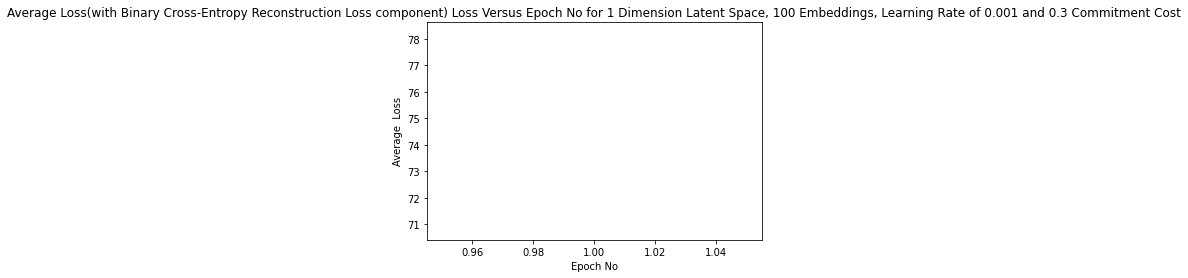

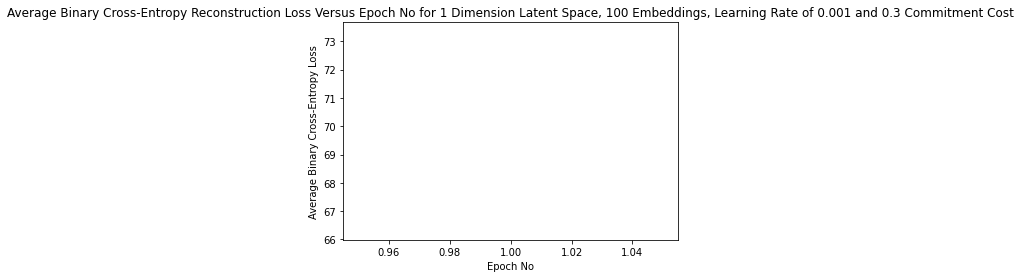

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
69.82919311523438
tensor(5.7740, device='cuda:0', grad_fn=<DivBackward0>)
75.60319519042969


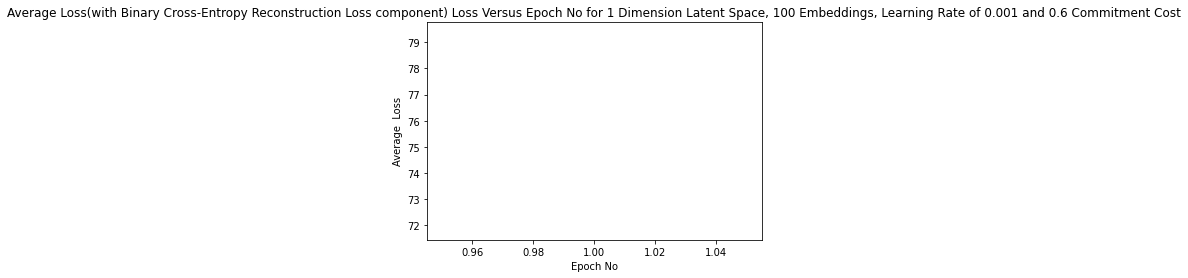

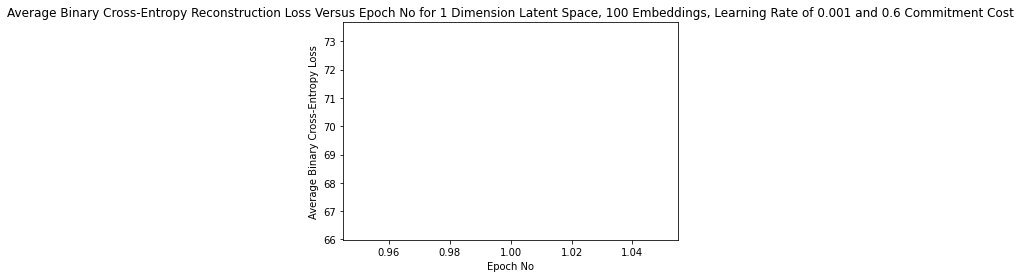

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
110.72122955322266
tensor(141.1508, device='cuda:0', grad_fn=<DivBackward0>)
251.87203979492188


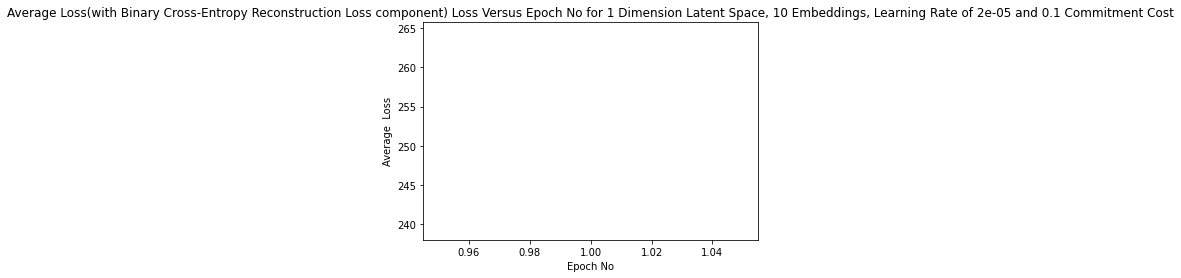

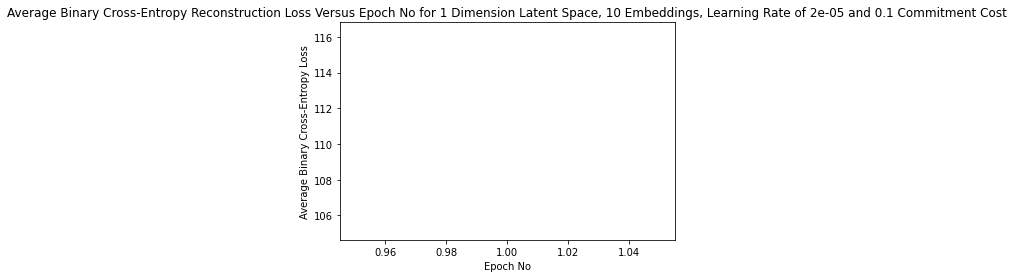

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
110.72122955322266
tensor(166.8146, device='cuda:0', grad_fn=<DivBackward0>)
277.5357971191406


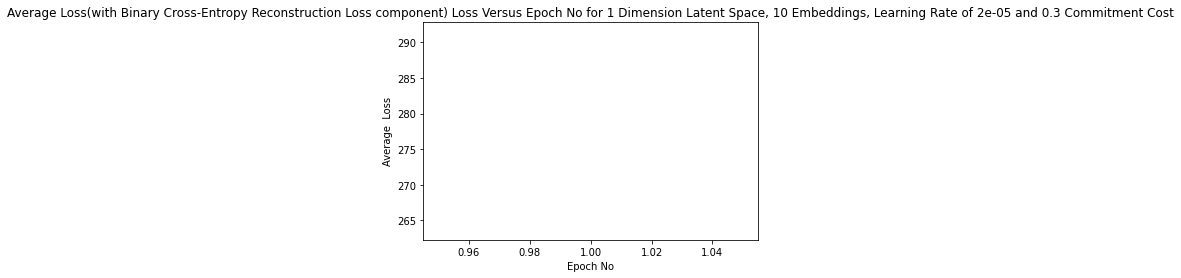

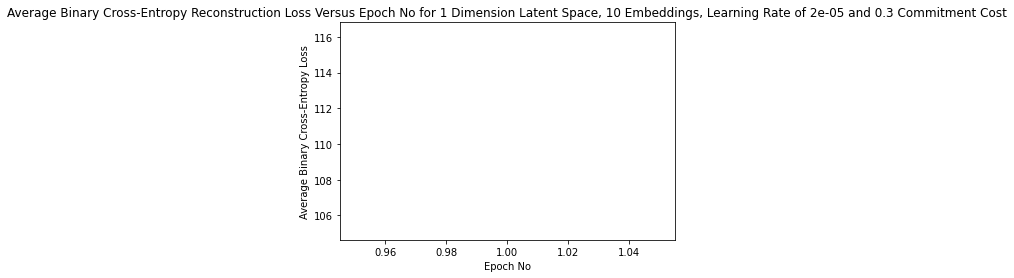

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
110.72122955322266
tensor(205.3104, device='cuda:0', grad_fn=<DivBackward0>)
316.0316467285156


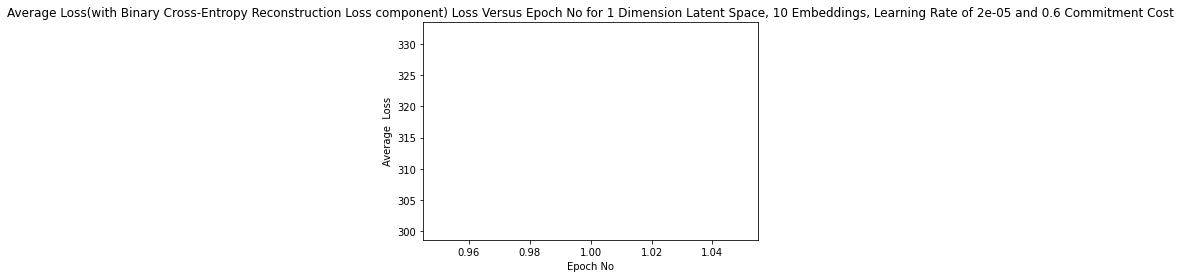

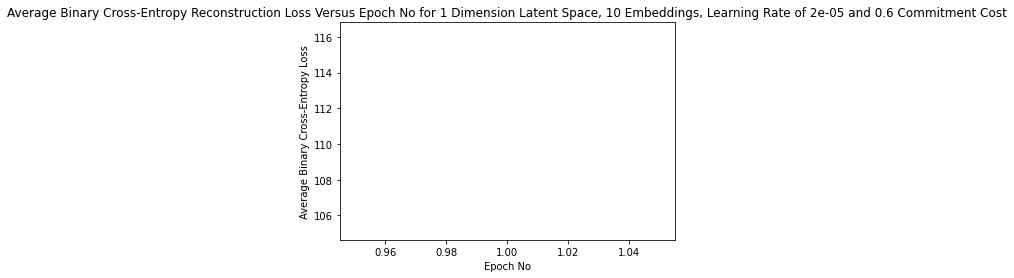

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
106.52059173583984
tensor(38.1965, device='cuda:0', grad_fn=<DivBackward0>)
144.7171173095703


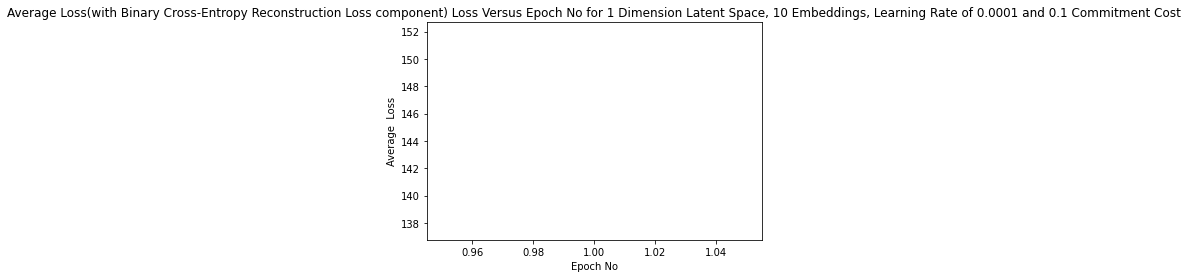

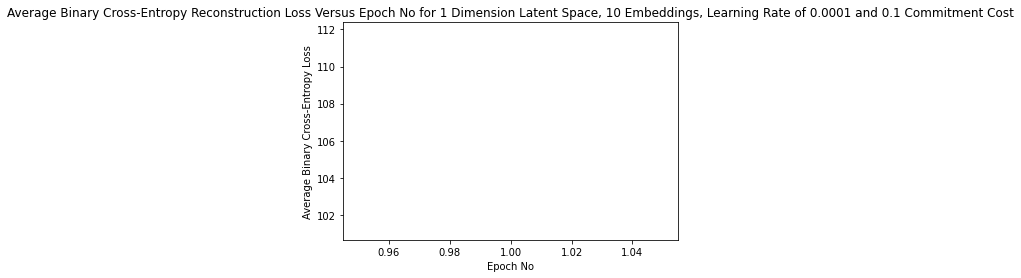

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
106.52059173583984
tensor(45.1414, device='cuda:0', grad_fn=<DivBackward0>)
151.6620330810547


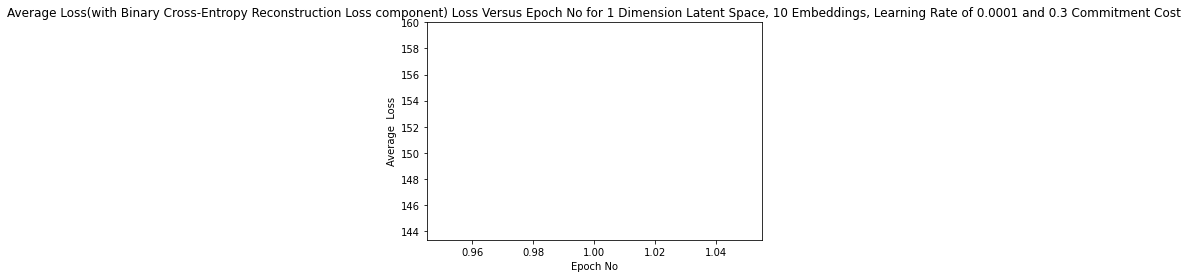

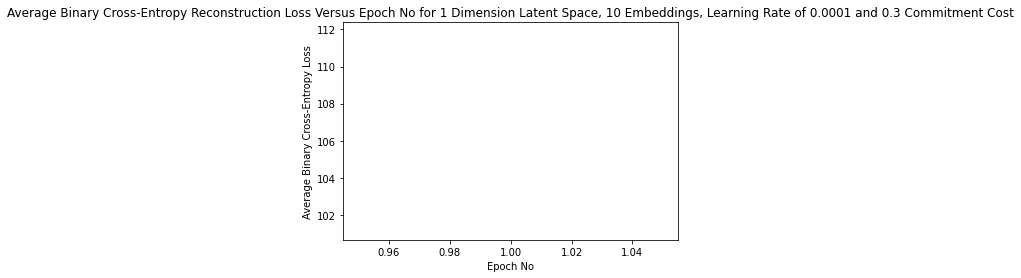

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
106.52059173583984
tensor(55.5587, device='cuda:0', grad_fn=<DivBackward0>)
162.07928466796875


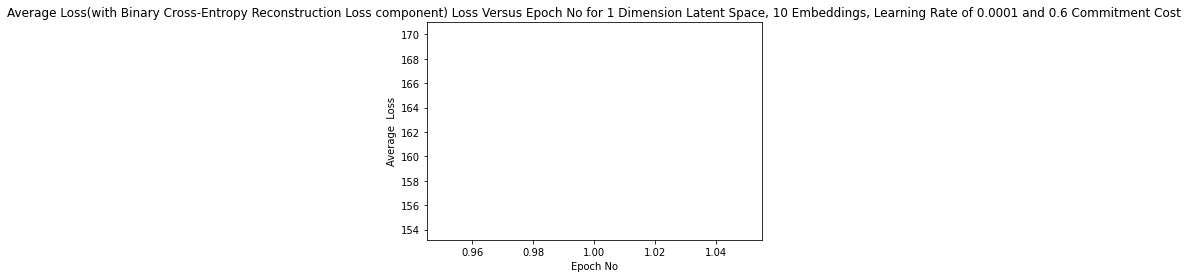

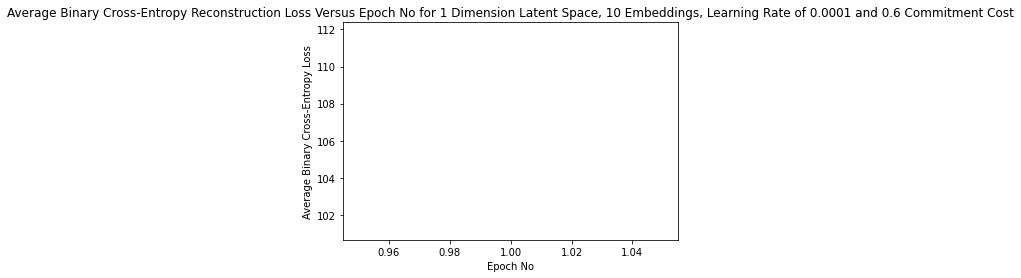

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
70.64636993408203
tensor(4.8502, device='cuda:0', grad_fn=<DivBackward0>)
75.49658966064453


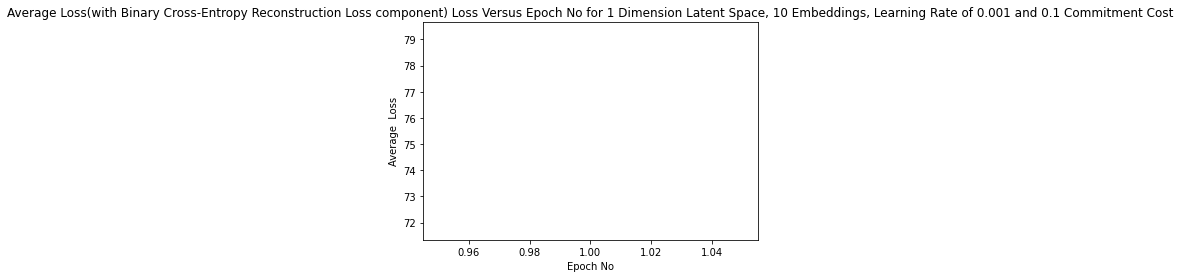

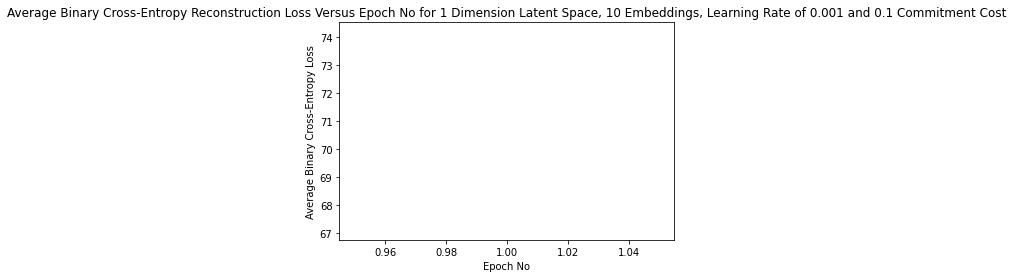

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
70.64636993408203
tensor(5.7321, device='cuda:0', grad_fn=<DivBackward0>)
76.3784408569336


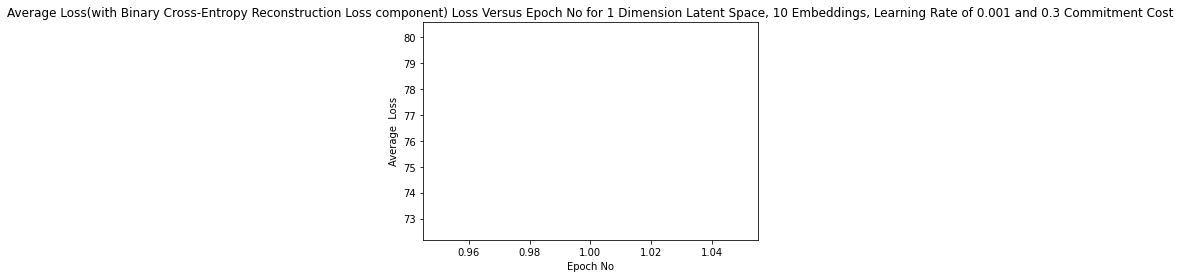

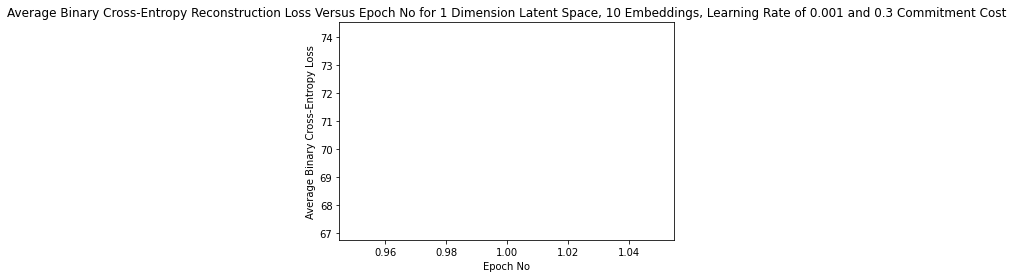

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
70.64636993408203
tensor(7.0549, device='cuda:0', grad_fn=<DivBackward0>)
77.70122528076172


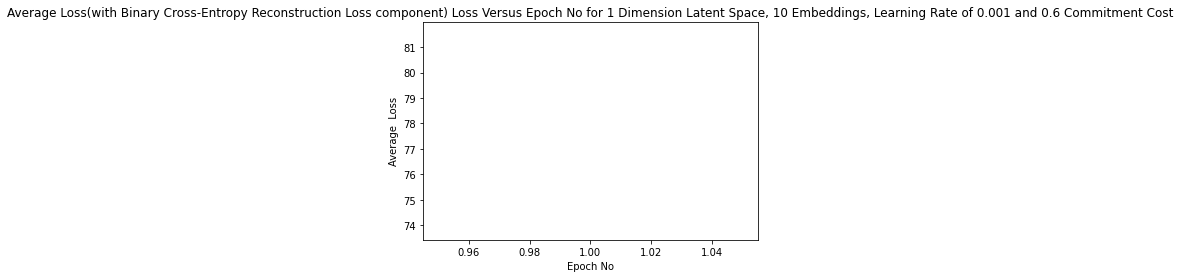

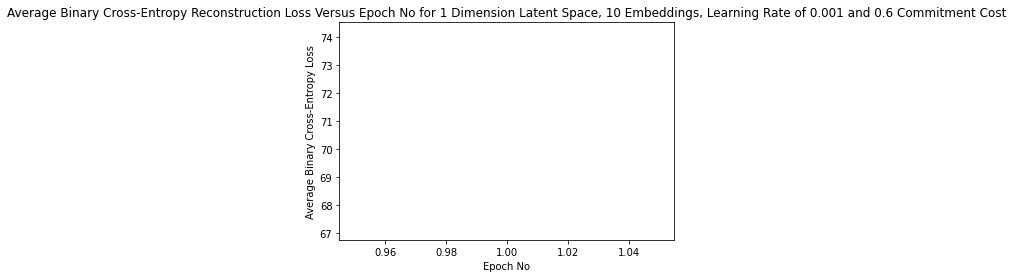

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
109.323486328125
tensor(156.3560, device='cuda:0', grad_fn=<DivBackward0>)
265.67950439453125


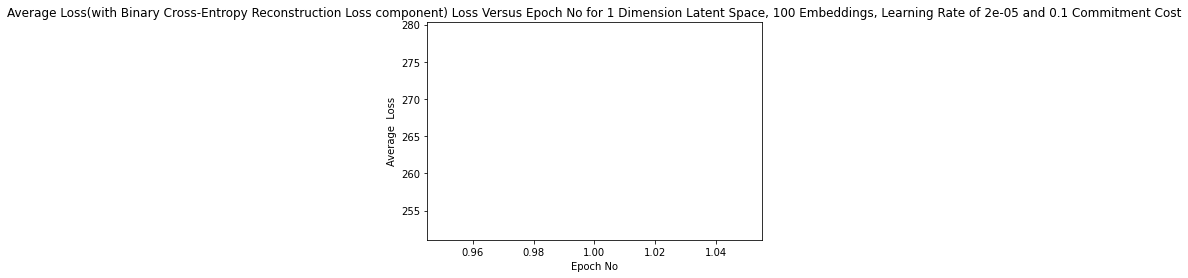

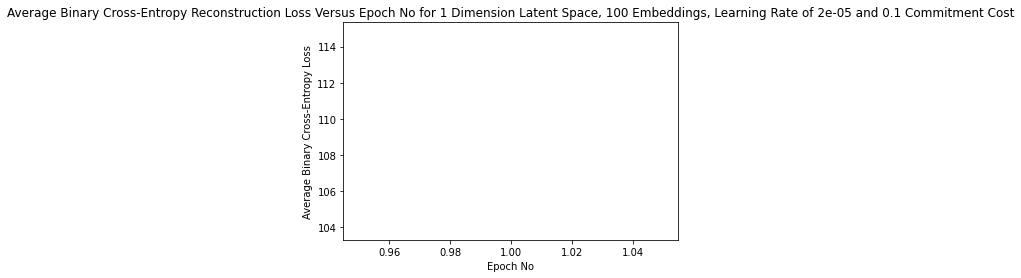

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
109.323486328125
tensor(184.7845, device='cuda:0', grad_fn=<DivBackward0>)
294.1079406738281


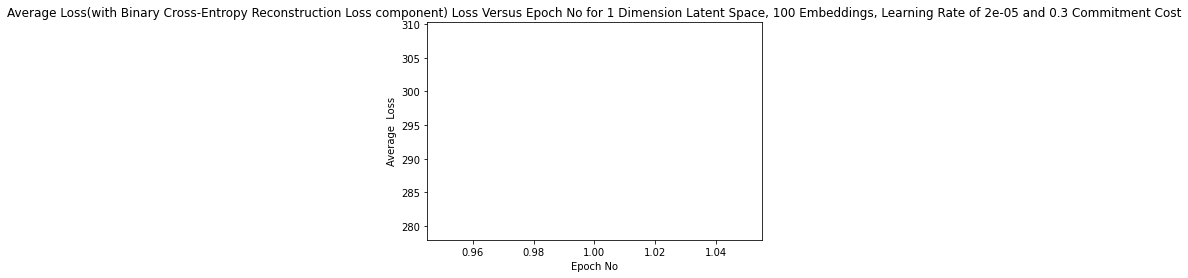

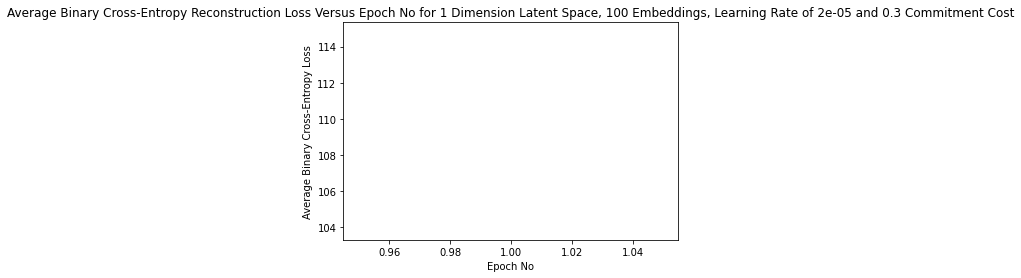

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
109.323486328125
tensor(227.4270, device='cuda:0', grad_fn=<DivBackward0>)
336.7504577636719


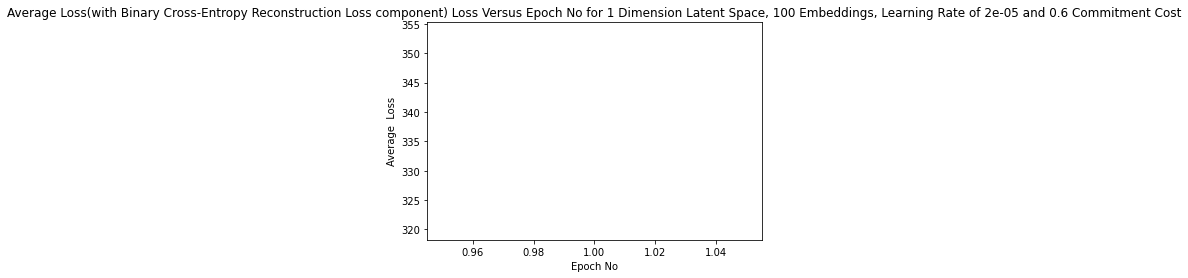

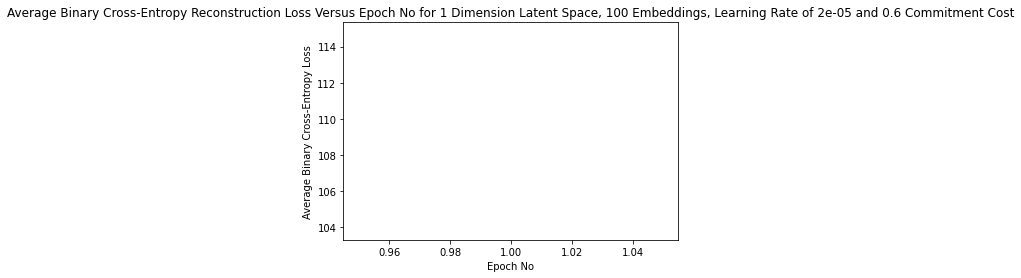

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
105.37667846679688
tensor(43.5768, device='cuda:0', grad_fn=<DivBackward0>)
148.95347595214844


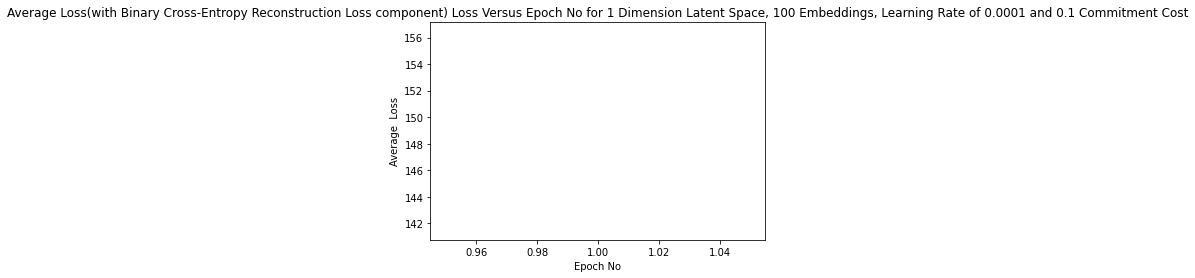

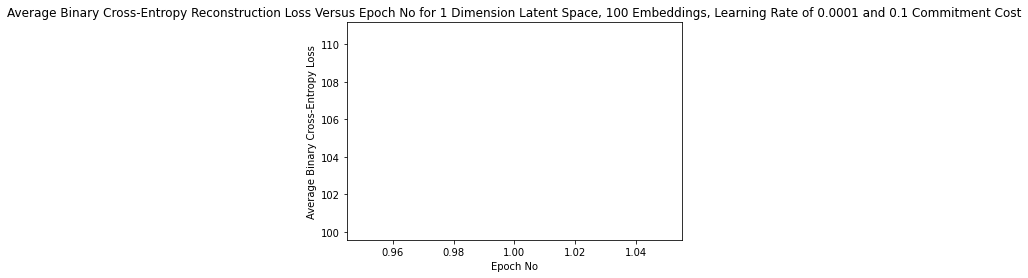

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
105.37667846679688
tensor(51.4999, device='cuda:0', grad_fn=<DivBackward0>)
156.87655639648438


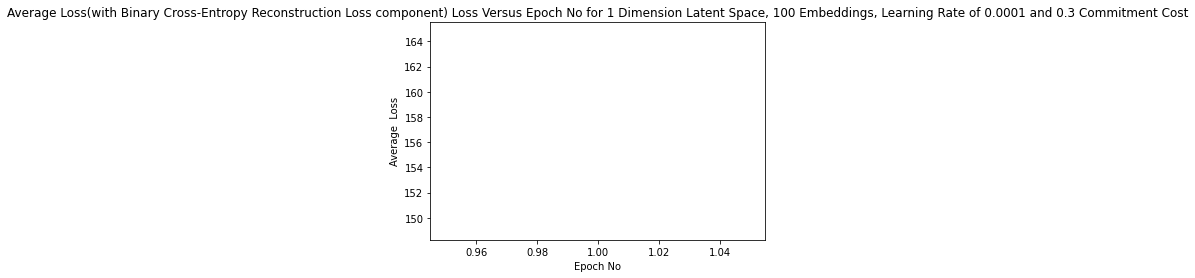

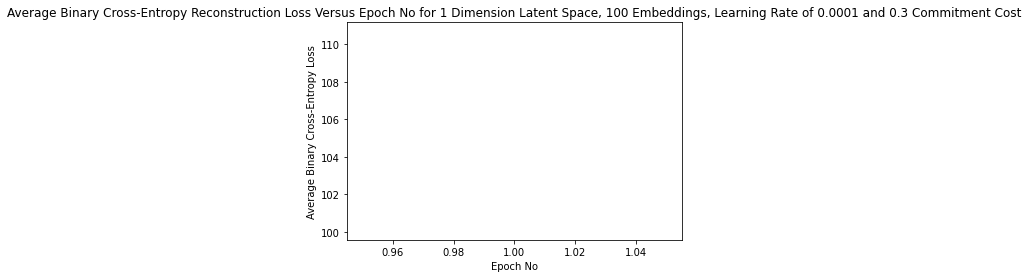

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
105.37667846679688
tensor(63.3845, device='cuda:0', grad_fn=<DivBackward0>)
168.76113891601562


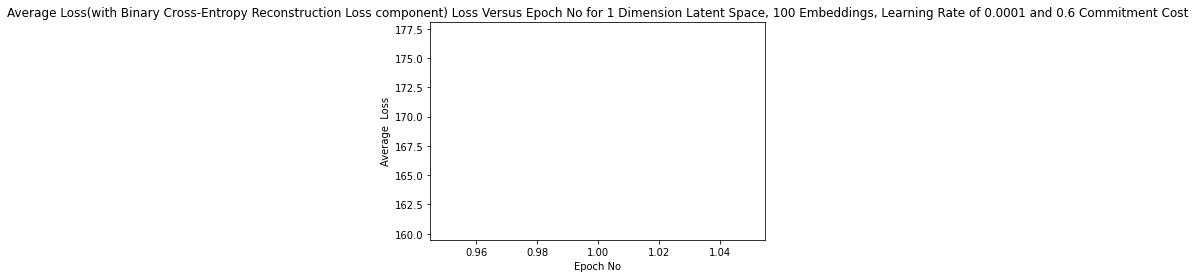

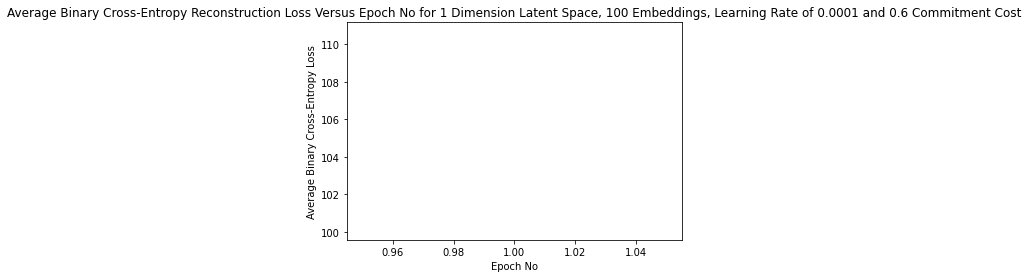

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
69.82919311523438
tensor(3.9696, device='cuda:0', grad_fn=<DivBackward0>)
73.79882049560547


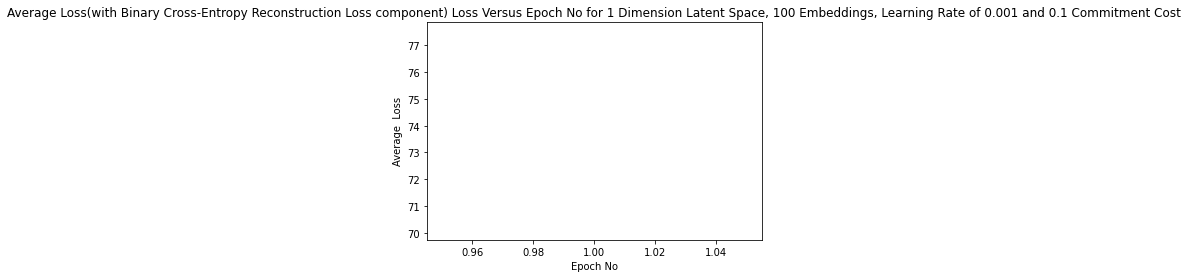

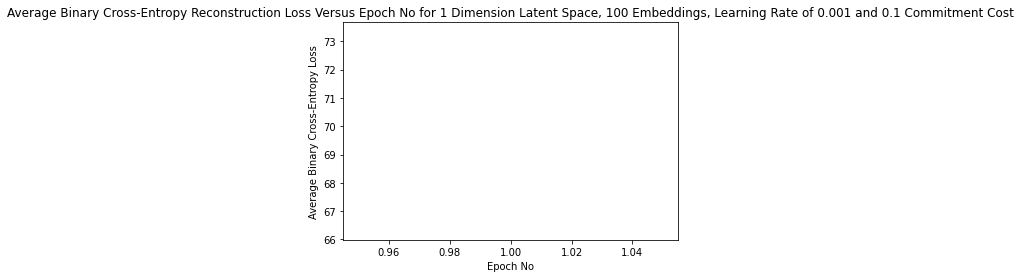

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
69.82919311523438
tensor(4.6914, device='cuda:0', grad_fn=<DivBackward0>)
74.52057647705078


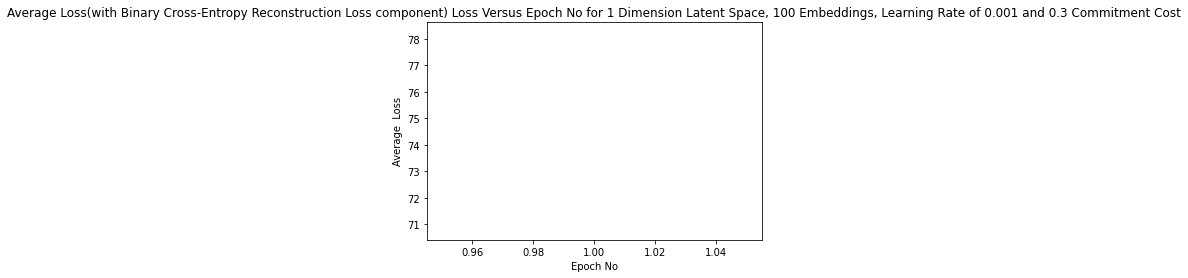

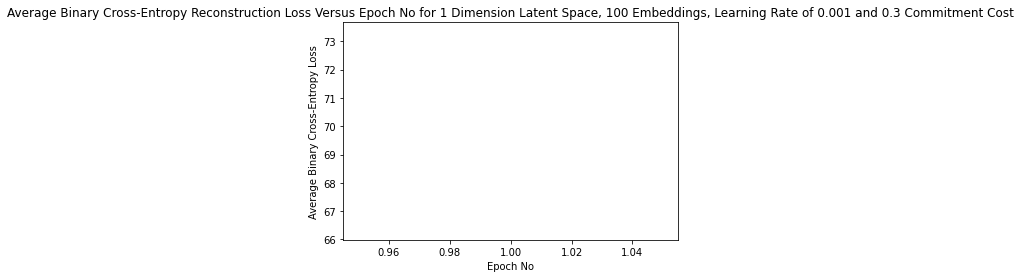

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
69.82919311523438
tensor(5.7740, device='cuda:0', grad_fn=<DivBackward0>)
75.60319519042969


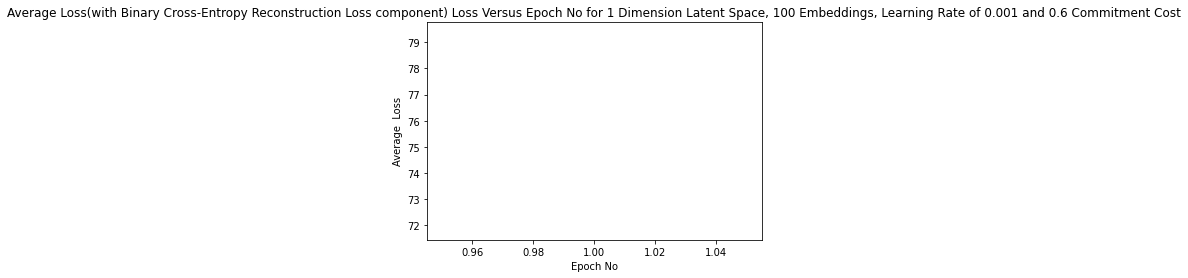

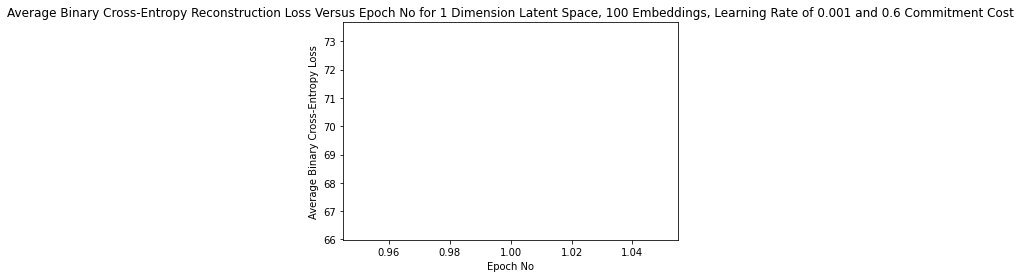

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [2]:
mod,ssim,ssimtest,indices=TRAINVALTEST()

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


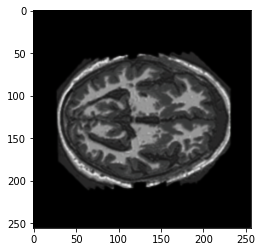

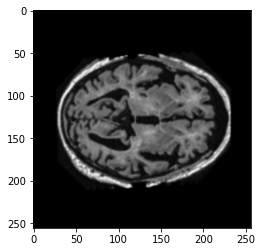

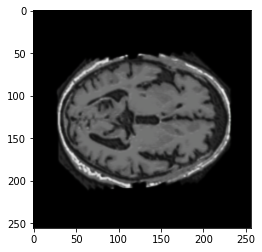

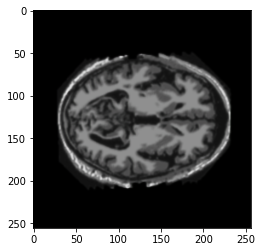

tensor(0.9064)


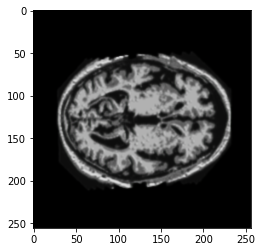

In [2]:
from predict import Predict
Predict()

In [9]:
import numpy as np
x=np.array([[3,4],[5,6]])
t=np.max(x)
m=np.where(x==t)
print(m[1][0])
#y=[1]
#print(y[m[0][0]])

1


In [4]:
x=19000 
y=10
import numpy as np

In [6]:
import torch
import numpy as np
x=torch.tensor(np.array([1]))
print(x+1)

tensor([2], dtype=torch.int32)


In [6]:
np.int32(x)*256*256*y

C:\Users\William\AppData\Local\Temp/ipykernel_24360/268573713.py:1: RuntimeWarning: overflow encountered in long_scalars
  np.int32(x)*256*256*y


-433061888

In [2]:
TRAINDATA,VALIDDATA,TESTDATA,DATALOADER=DataProcess()
TRAINDATA=TRAINDATA.permute(0, 3, 2, 1).contiguous()
VALIDDATA=VALIDDATA.permute(0, 3, 2, 1).contiguous()

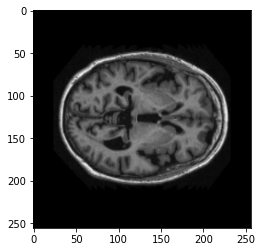

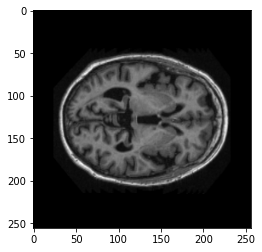

In [15]:
import matplotlib.pyplot as plt
#permute(0, 3, 2, 1)
TRAINDATA1=TRAINDATA.permute(0,3,2,1)
#testing on test datp.yplota set to check for clear image
plt.imshow(TRAINDATA1[9664,:,:,:].detach().numpy().astype('float32'),cmap="Greys_r")
plt.show()
plt.imshow(TRAINDATA1[0,:,:,:].detach().numpy().astype('float32'),cmap="Greys_r")
plt.show()

In [20]:
import re
print((re.search("^[A-Za-z0-9_]*$", 'he llo')))

None


In [9]:
print(TRAINDATA[0,:,:,:].detach().numpy().reshape(256,256,3))

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [7]:
TESTDATA=TESTDATA.permute(0,3,2,1).contiguous()

In [18]:
from pandas import DataFrame


x=DataFrame(np.array([1,2]))
x[0,0]=in1

In [6]:
from torchmetrics import StructuralSimilarityIndexMeasure
import numpy as np
import torch
predict=np.empty((len(VALIDDATA),VALIDDATA.shape[1],VALIDDATA.shape[2],VALIDDATA.shape[3]))
for i in range(0,len(VALIDDATA)):
 predict[i,:]=in1(VALIDDATA[i].cuda().float().reshape((1,VALIDDATA[i].shape[0],VALIDDATA[i].shape[1],VALIDDATA[i].shape[2])))[0].cpu().detach().numpy()
#metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='elementwise_mean')
#ssim=np.empty((len(VALIDDATA)))

#ssim=metric(torch.tensor(np.float32(predict)),VALIDDATA.to(torch.float32))
    


c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [8]:
from torchmetrics import StructuralSimilarityIndexMeasure
import numpy as np
import torch
predict1=np.empty((len(TESTDATA),TESTDATA.shape[1],TESTDATA.shape[2],TESTDATA.shape[3]))
for i in range(0,len(TESTDATA)):
 predict1[i,:]=in1(TESTDATA[i].cuda().float().reshape((1,TESTDATA[i].shape[0],TESTDATA[i].shape[1],TESTDATA[i].shape[2])))[0].cpu().detach().numpy()

In [9]:

metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='sum')
ssim=0
for i in range(0,112):
 ssim=metric(torch.tensor(np.float32(predict[range(i*10,(i+1)*10),:])),VALIDDATA.to(torch.float32)[range(i*10,(i+1)*10),:])+ssim
SSim=ssim/1120

In [24]:
metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='sum')
ssim=0
for i in range(0,int(len(TESTDATA)/4)):
 ssim=metric(torch.tensor(np.float32(predict[range(i*4,(i+1)*4),:])),TESTDATA.to(torch.float32)[range(i*4,(i+1)*4),:])+ssim
SSim1=ssim/len(TESTDATA)

RuntimeError: Argument #4: Padding size should be less than the corresponding input dimension, but got: padding (5, 5) at dimension 3 of input 4

In [27]:
predict[1,:]

array([[[0.0781433 , 0.06822505, 0.07208841],
        [0.02176276, 0.02036053, 0.01986814],
        [0.01364383, 0.01283426, 0.01207874],
        ...,
        [0.01319501, 0.01238388, 0.01185425],
        [0.01990101, 0.02002859, 0.01848209],
        [0.07393565, 0.07425975, 0.06709766]],

       [[0.02106826, 0.01929392, 0.0211123 ],
        [0.00272764, 0.00262524, 0.002772  ],
        [0.00129465, 0.001253  , 0.00127454],
        ...,
        [0.001257  , 0.0012132 , 0.00123474],
        [0.00246259, 0.00251608, 0.0024238 ],
        [0.02062164, 0.02086908, 0.01996801]],

       [[0.01331599, 0.01223937, 0.0133971 ],
        [0.00134658, 0.00134043, 0.00136606],
        [0.00061972, 0.00061948, 0.00062169],
        ...,
        [0.00060552, 0.00060847, 0.00060807],
        [0.00120153, 0.00125569, 0.00119231],
        [0.01305776, 0.01345943, 0.01230198]],

       ...,

       [[0.0148162 , 0.01384647, 0.01529167],
        [0.00150496, 0.00147571, 0.00156605],
        [0.00066706, 0

In [2]:
metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='sum')
ssim=0
for i in range(0,int(len(TESTDATA)/4)):
 ssim=metric(torch.tensor(np.float32(predict[range(i*4,(i+1)*4),:])).reshape(4,256,256,3),TESTDATA.to(torch.float32)[range(i*4,(i+1)*4),:].reshape(4,256,256,3))+ssim
SSim1=ssim/len(TESTDATA)
SSim1

NameError: name 'SSim1' is not defined

In [20]:
SSim1

tensor(0.5951)

In [13]:
#import pickle
with open('goodmodel1.pkl', 'wb') as file:
 pickle.dump(in1, file)

In [12]:
import dill as pickle

In [11]:
print(in1)
torch.save(in1,'model.pt')

indeed(
  (layer0): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (layer1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (layer3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer4): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (layer5): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer6): Conv2d(5, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
)


AttributeError: Can't pickle local object 'VQVAE1.<locals>.indeed'

In [31]:
VALIDDATA[i].cuda().float().reshape((1,VALIDDATA[i].shape[0],VALIDDATA[i].shape[1],VALIDDATA[i].shape[2]))

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0')

In [43]:
s=np.array([[3,2],[5,4]])
m=np.where(s>4)[1]
t=np.array([2,1])
print(m)
print(t[m])


[0]
[2]


In [6]:
in1(VALIDDATA[i].cuda().float().reshape((1,VALIDDATA[i].shape[0],VALIDDATA[i].shape[1],VALIDDATA[i].shape[2])))[0]

tensor([[[[0.2821, 0.2221, 0.2259,  ..., 0.2452, 0.2817, 0.3795],
          [0.2301, 0.1181, 0.1134,  ..., 0.1152, 0.1542, 0.2897],
          [0.1601, 0.0789, 0.0777,  ..., 0.0904, 0.1500, 0.2814],
          ...,
          [0.1835, 0.0954, 0.0919,  ..., 0.0971, 0.1469, 0.2761],
          [0.1815, 0.1024, 0.1051,  ..., 0.1178, 0.1722, 0.2978],
          [0.3079, 0.2173, 0.2004,  ..., 0.2128, 0.2609, 0.3548]],

         [[0.3098, 0.2041, 0.1964,  ..., 0.2075, 0.2211, 0.2881],
          [0.2269, 0.0973, 0.0874,  ..., 0.0898, 0.1152, 0.1870],
          [0.1834, 0.0765, 0.0661,  ..., 0.0758, 0.1057, 0.1749],
          ...,
          [0.1965, 0.0799, 0.0797,  ..., 0.0813, 0.1080, 0.1758],
          [0.1993, 0.0915, 0.0880,  ..., 0.0956, 0.1240, 0.1950],
          [0.2953, 0.1796, 0.1709,  ..., 0.1823, 0.2189, 0.2865]],

         [[0.2742, 0.2163, 0.2232,  ..., 0.2193, 0.2554, 0.3200],
          [0.1499, 0.0813, 0.0764,  ..., 0.0902, 0.1333, 0.2372],
          [0.1446, 0.0712, 0.0625,  ..., 0